In [ ]:
!pip install PyPDF2 pdf2image opencv-python pytesseract pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.1 [186 kB]
Fetched 186 kB in 0s (482 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120500 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.1_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.1) ...
Setting up poppler-utils (22.02.0-2ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (9,518 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120530 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
from pdf2image import convert_from_path
from pytesseract import image_to_string
from PIL import Image

In [ ]:
path_to_pdf = '/content/BP2023062630268.pdf'

In [ ]:
def convert_pdf_to_img(pdf_file):
    return convert_from_path(pdf_file)

def convert_image_to_text(file):
    text = image_to_string(file)
    return(text)

def get_text_from_any_pdf(pdf_file):
    images = convert_pdf_to_img(pdf_file)
    final_text = ""
    for pg, img in enumerate(images):

        final_text += convert_image_to_text(img)
        print("Page n{}".format(pg))
        print(convert_image_to_text(img))

    return final_text

In [ ]:
data = get_text_from_any_pdf(path_to_pdf)

Page n0
KONKISA, SUJATHA

303/35 WALDRON RD, SEFTON. 2162

Phone: 99115858

Birthdate: 01/12/1955 Sex: F Medicare Number: 2734521624
Your Reference: 00120677 Lab Reference: 884122152-E-Thyroid
Function

Laboratory: Douglass Hanly Moir Pathology eOrder

Addressee: DR GEETA TADIMALLA Referred by: DR GEETA TADIMALLA
Name of Test: Thyroid Function

Requested: 09/10/2022 Collected: 10/10/2022 Reported: 10/10/2022
19:42

Clinical notes: HEALTH CHECK UP

Clinical Notes : HEALTH CHECK UP

TFT

Date 25/04/20 12/09/20 18/09/21 10/10/22

Time F-Fast Unkn F Unkn F 0903 F 0902 F

Lab ID 844928367 846525160 863458987 884122152 Units Reference
TSH L 0.39 0.78 0.58 0.47 = mIU/L

(0.40-4.00)

Free T4 14.8 pmol/L (9.0-19.0)
Free T3 3.3 pmol/L (2.6-6.0)

Tests Completed: LFT(s),Lipids(s),C(s),UCreat(s),E(s),Glu(p),Phos(s),
UA(s),Iron(s),HDL & LIPIDS,CRP(s),Vit D(s),TSH(s),
HbAlc Mon(e),ESR(e)

Tests Pending : Ca(s)

Sample Pending

KONKISA, SUJATHA

303/35 WALDRON RD, SEFTON. 2162

Phone: 99115858

Birth

# **Exporting all the extracted data to CSV**

In [ ]:
import csv
import pandas as pd

def extract_values(text):
    values = []
    lines = text.split("\n")
    for line in lines:
        if line.strip():  # Check if the line is not empty after removing leading/trailing whitespace
            values.append(line.split())
    return values

def save_to_csv(values, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in values:
            if any(row):  # Exclude empty rows
                writer.writerow(row)

In [ ]:
values=extract_values(data)
save_to_csv(values, "extracted_text.csv")

In [ ]:
import pandas as pd

# Read the CSV file into a dataframe
df = pd.read_csv("/content/extracted_text.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.startswith(("HbAlc-NGSP", "LDL", "HDL", "Serum")) & df[0].str.contains(r'\d')]

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("filtered_data.csv", header=False, index=False)

# Print the filtered dataframe
print(filtered_df)


                                                    0
0   Serum,ferritin,levels,between,15-30,ug/L,may,r...
1             HDL,Chol.,1.0,1.3,1.2,1.3,mmol/L,(>1.2)
2        LDL,Chol.,H,3.7,H,3.8,2.9,H,3.8,mmol/L,(<3.0
3                         HDL,cholesterol,>1.0,mmol/L
4   LDL,cholesterol,<2.5,mmol/L,(<1.8,mmol/L,for,v...
5                    HDL,(1.0-2.0),mmol/L,1.0,1.2,1.3
6                    LDL,(1.5-3.4),mmol/L,3.0,2.8,2.3
7                  Serum,(3.4-5.4),mmol/L,6.8,4.5,5.0
8                    Serum,Folate,36.1,nmol/L,(>,9.0)
9                            Serum,Vitamin,B12,Assay:
10                            Serum,Active,B12,Assay:


In [ ]:
import pandas as pd
import re

# Read the CSV file into a dataframe
df = pd.read_csv("/content/extracted_text.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Serum|HbAlc-NGSP|LDL|HDL).*\d')]

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("filtered_data.csv", header=False, index=False)

# Print the filtered dataframe
print(filtered_df)


                                                    0
0   Serum,ferritin,levels,between,15-30,ug/L,may,r...
1             HDL,Chol.,1.0,1.3,1.2,1.3,mmol/L,(>1.2)
2        LDL,Chol.,H,3.7,H,3.8,2.9,H,3.8,mmol/L,(<3.0
3                         HDL,cholesterol,>1.0,mmol/L
4   LDL,cholesterol,<2.5,mmol/L,(<1.8,mmol/L,for,v...
5                    HDL,(1.0-2.0),mmol/L,1.0,1.2,1.3
6                    LDL,(1.5-3.4),mmol/L,3.0,2.8,2.3
7                  Serum,(3.4-5.4),mmol/L,6.8,4.5,5.0
8                    Serum,Folate,36.1,nmol/L,(>,9.0)
9                            Serum,Vitamin,B12,Assay:
10                            Serum,Active,B12,Assay:


**Extracting data from Selected report pages(first_page, last_page)**

In [ ]:
import pytesseract
from pdf2image import convert_from_path

def convert_image_to_text(image):
    text = pytesseract.image_to_string(image)
    return text

def get_text_from_pdf_range(pdf_file, start_page, end_page):
    text = ""
    images = convert_from_path(pdf_file, first_page=start_page, last_page=end_page)
    for page_number, image in enumerate(images, start=start_page):
        page_text = convert_image_to_text(image)
        print("Page", page_number, ":", page_text)
        text += page_text
    return text


In [ ]:
report1 = get_text_from_pdf_range(path_to_pdf, 1, 5)

Page 1 : KONKISA, SUJATHA

303/35 WALDRON RD, SEFTON. 2162

Phone: 99115858

Birthdate: 01/12/1955 Sex: F Medicare Number: 2734521624
Your Reference: 00120677 Lab Reference: 884122152-E-Thyroid
Function

Laboratory: Douglass Hanly Moir Pathology eOrder

Addressee: DR GEETA TADIMALLA Referred by: DR GEETA TADIMALLA
Name of Test: Thyroid Function

Requested: 09/10/2022 Collected: 10/10/2022 Reported: 10/10/2022
19:42

Clinical notes: HEALTH CHECK UP

Clinical Notes : HEALTH CHECK UP

TFT

Date 25/04/20 12/09/20 18/09/21 10/10/22

Time F-Fast Unkn F Unkn F 0903 F 0902 F

Lab ID 844928367 846525160 863458987 884122152 Units Reference
TSH L 0.39 0.78 0.58 0.47 = mIU/L

(0.40-4.00)

Free T4 14.8 pmol/L (9.0-19.0)
Free T3 3.3 pmol/L (2.6-6.0)

Tests Completed: LFT(s),Lipids(s),C(s),UCreat(s),E(s),Glu(p),Phos(s),
UA(s),Iron(s),HDL & LIPIDS,CRP(s),Vit D(s),TSH(s),
HbAlc Mon(e),ESR(e)

Tests Pending : Ca(s)

Sample Pending

KONKISA, SUJATHA

303/35 WALDRON RD, SEFTON. 2162

Phone: 99115858

Birt

In [ ]:
values=extract_values(report1)
save_to_csv(values, "report_1.csv")

In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_1.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Cholesterol|Triglycerides|Serum|HbAlc-NGSP|LDL|HDL).*\d')]

# Remove "F" values from the "Time" row
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace('F,', '')
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace(',F$', '')

# Remove "H" values from the "LDL-" row
filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0] = filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0].str.replace('H,', '')

# Remove "H" values from the "Cholesterol" row
filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0].str.replace('H,', '')

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Delete rows with far greater length
max_length = filtered_df[0].str.len().max()
filtered_df = filtered_df[filtered_df[0].str.len() < max_length ]

# Delete 2 rows above "Date" if it follows "Time" row
rows_to_delete = []
for i in range(1, len(filtered_df)):
    if filtered_df.iloc[i][0].startswith('Date') and filtered_df.iloc[i-1][0].startswith('Time'):
        rows_to_delete.extend([i-2, i-1])

filtered_df = filtered_df.drop(rows_to_delete)

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Combine "HDL" and "Chol." into one value
# filtered_df[0] = filtered_df[0].str.replace('Date,16/01/21,18/09/21,22/01/22,10/10/22', 'Date,16/01/21,18/09/21,22/01/22,10/10/22,Units,Reference')
filtered_df[0] = filtered_df[0].str.replace('Time,F-Fast,0910,0903,1014,0902', 'Time,09:10,09:03,10:14,09:02')
filtered_df[0] = filtered_df[0].str.replace('HDL,Chol.,', 'HDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,Chol.,', 'LDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('HDL,cholesterol,', 'HDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,cholesterol,', 'LDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('Date,of,Service:', 'Date_of_service')

# Drop rows starting with "HDL-cholesterol" and "LDL-cholesterol"
filtered_df = filtered_df[~filtered_df[0].str.startswith('HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('LDL-cholesterol')]
# filtered_df = filtered_df[~filtered_df[0].str.startswith('Non-HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Date_of_service')]

# Reset the index again
filtered_df.reset_index(drop=True, inplace=True)

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

# df_2 = filtered_df[['Date', '16/01/21', '18/09/21', '22/01/22', '10/10/22']].transpose()
df_2 = filtered_df.iloc[:, 0:5].transpose()

df_2.columns = df_2.iloc[0]

# Remove the first row from the split dataframe
df_2 = df_2[1:]

df_2['Date'] = pd.to_datetime(df_2['Date'])

# Make the first row the header and replace "None" values in the first row
filtered_df.loc[0, filtered_df.loc[0].isna()] = ['Units', 'Reference']
filtered_df.columns = filtered_df.iloc[0]

# Remove the first row from the split dataframe
filtered_df = filtered_df[1:]

# Reset the index of df_2
# df_2.reset_index(drop=True, inplace=True)

print(df_2)

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("result_1.csv", header=True, index=False)

# Print the filtered dataframe
# print(filtered_df)


0       Date   Time Cholesterol Triglycerides HDL-Chol LDL-Chol
1 2021-01-16  09:10         5.3           1.2      1.0      3.7
2 2021-09-18  09:03         5.7           1.2      1.3      3.8
3 2022-01-22  10:14         4.6           1.0      1.2      2.9
4 2022-10-10  09:02         5.6           1.0      1.3      3.8


In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_1.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Sodium|Potassium|Chloride|Bicarbonate|Urea|Creatinine|eGFR|Urate|Calcium|Corr|Phosphate.|Bili.Total|ALP|GGT|LD|AST|ALT|Total|Albumin|Globulin).*\d')]

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Delete rows with far greater length
max_length = filtered_df[0].str.len().max()
filtered_df = filtered_df[filtered_df[0].str.len() < max_length ]

filtered_df[0] = filtered_df[0].str.replace('Date,16/01/21,18/09/21,22/01/22,10/10/22', 'Date,16/01/21,18/09/21,10/10/22')
filtered_df[0] = filtered_df[0].str.replace('Time,F-Fast,0910,F,0903,F,1014,F,0902,F', 'Time,09:10,09:03,09:02')
filtered_df[0] = filtered_df[0].str.replace('Total,cholesterol', 'Total_cholesterol')
filtered_df[0] = filtered_df[0].str.replace('Total,Protein', 'Total Protein')
filtered_df[0] = filtered_df[0].str.replace('Corr,Calcium', 'Corr Calcium')
filtered_df[0] = filtered_df[0].str.replace('eGFR,>90,88,76,mL/min/1.73m2,\(>59', 'eGFR,>90,88,76,mL/min/1.73m2,(>59)')
filtered_df[0] = filtered_df[0].str.replace('Urate,0.30,0.30,0.29,mmol/L', 'Urate,0.30,0.30,0.29,mmol/L,(0.15-0.40)')
filtered_df[0] = filtered_df[0].str.replace('Calcium,2.34,2.25,2.51,mmol/L', 'Calcium,2.34,2.25,2.51,mmol/L,(2.15-2.55)')
filtered_df[0] = filtered_df[0].str.replace('Corr Calcium,2.40,2.37,2.51,mmol/L', 'Corr Calcium,2.40,2.37,2.51,mmol/L,(2.15-2.55)')
filtered_df[0] = filtered_df[0].str.replace('Phosphate.', 'Phosphate')
filtered_df[0] = filtered_df[0].str.replace('Date,of,Service:', 'Date_of_service')

# Drop rows starting with "HDL-cholesterol" and "LDL-cholesterol"
filtered_df = filtered_df[~filtered_df[0].str.startswith('LDL')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Total_cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Date_of_service')]

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Delete 2 rows above "Date" if it follows "Time" row
rows_to_delete = []
for i in range(1, len(filtered_df)):
    if filtered_df.iloc[i][0].startswith('Date') and filtered_df.iloc[i-1][0].startswith('Time'):
        rows_to_delete.extend([i-2, i-1])

filtered_df = filtered_df.drop(rows_to_delete)

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

# Make the first row the header and replace "None" values in the first row
filtered_df.loc[0, filtered_df.loc[0].isna()] = ['Units', 'Reference']

filtered_df.columns = filtered_df.iloc[0]

# Remove the first row from the split dataframe
filtered_df = filtered_df[1:]

df_4 = filtered_df[['Date', '16/01/21', '18/09/21', '10/10/22']].transpose().reset_index()

# Set the first row as the column names
df_4.columns = df_4.iloc[0]

# Remove the first row and reset the index
df_4 = df_4[1:].reset_index(drop=True)

df_4['Date'] = pd.to_datetime(df_4['Date'], format='%d/%m/%y')

df_4['eGFR'] = df_4['eGFR'].str.replace(r'[><]', '')
df_4['ALT'] = df_4['ALT'].str.replace(r'[><]', '')

print(df_4)

0       Date   Time Sodium Potassium Chloride Bicarbonate Urea Creatinine  \
0 2021-01-16  09:10    141       4.5      105          27  3.0         60   
1 2021-09-18  09:03    136       4.4      104          24  4.4         65   
2 2022-10-10  09:02    140       4.4      101          28  5.2         70   

0 eGFR Urate  ... Phosphate Bili.Total ALP GGT   LD AST ALT Total Protein  \
0   90  0.30  ...      0.95          3  64  11  130  14   8            71   
1   88  0.30  ...      1.07          8  77  11  133  15   8            68   
2   76  0.29  ...      1.03          7  76  12  151  17   6            71   

0 Albumin Globulin  
0      40       31  
1      37       31  
2      43       28  

[3 rows x 22 columns]


In [ ]:
print(filtered_df.columns)

Index(['Date', '16/01/21', '18/09/21', '10/10/22', 'Units', 'Reference'], dtype='object', name=0)


In [ ]:
df_4

,Date,Time,Sodium,Potassium,Chloride,Bicarbonate,Urea,Creatinine,eGFR,Urate,...,Phosphate,Bili.Total,ALP,GGT,LD,AST,ALT,Total Protein,Albumin,Globulin
0,2021-01-16,09:10,141,4.5,105,27,3.0,60,90,0.30,...,0.95,3,64,11,130,14,8,71,40,31
1,2021-09-18,09:03,136,4.4,104,24,4.4,65,88,0.30,...,1.07,8,77,11,133,15,8,68,37,31
2,2022-10-10,09:02,140,4.4,101,28,5.2,70,76,0.29,...,1.03,7,76,12,151,17,6,71,43,28


In [ ]:
print(df_2)

0       Date   Time Cholesterol Triglycerides HDL-Chol LDL-Chol
1 2021-01-16  09:10         5.3           1.2      1.0      3.7
2 2021-09-18  09:03         5.7           1.2      1.3      3.8
3 2022-01-22  10:14         4.6           1.0      1.2      2.9
4 2022-10-10  09:02         5.6           1.0      1.3      3.8


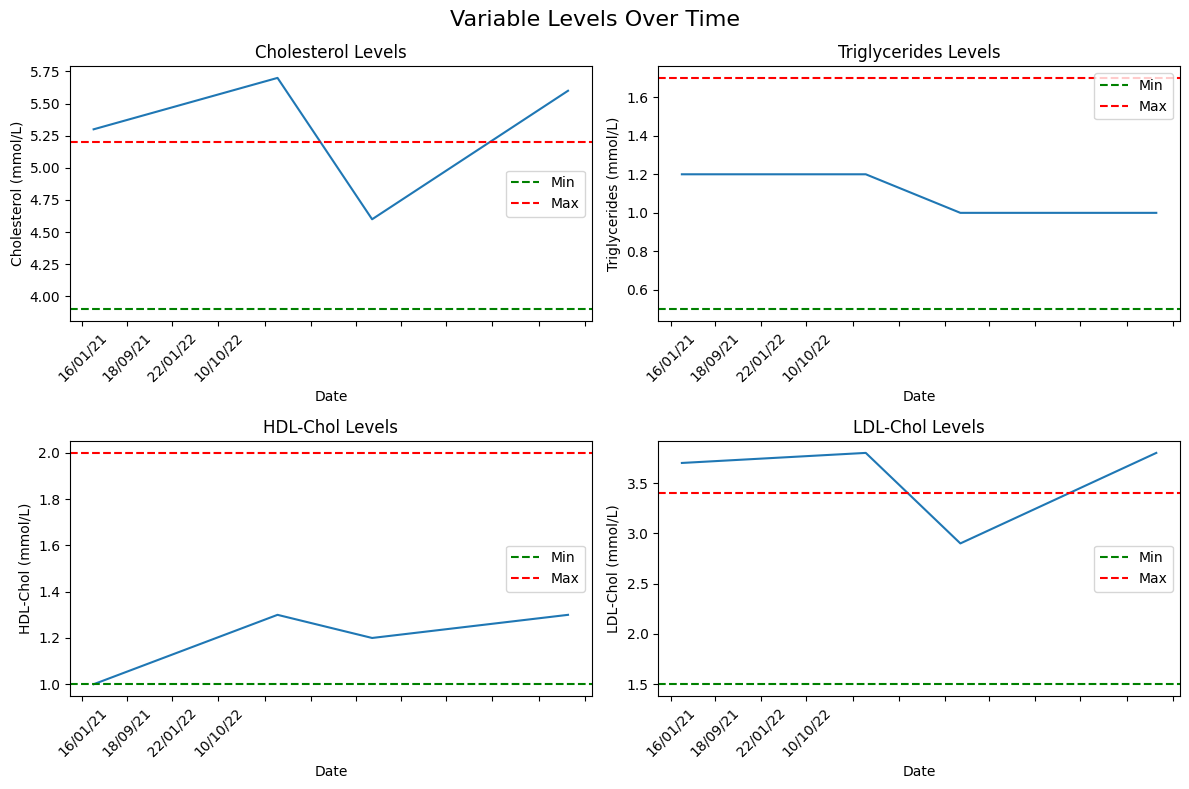

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Date': ['16/01/21', '18/09/21', '22/01/22', '10/10/22'],
    'Time': ['09:10', '09:03', '10:14', '09:02'],
    'Cholesterol': [5.3, 5.7, 4.6, 5.6],
    'Triglycerides': [1.2, 1.2, 1.0, 1.0],
    'HDL-Chol': [1.0, 1.3, 1.2, 1.3],
    'LDL-Chol': [3.7, 3.8, 2.9, 3.8]
}

df_1 = pd.DataFrame(data)

# Convert date strings to datetime format
df_1['Date'] = pd.to_datetime(df_1['Date'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Cholesterol', 'Triglycerides', 'HDL-Chol', 'LDL-Chol']
thresholds = {'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'HDL-Chol': (1.0, 2.0),
              'LDL-Chol': (1.5, 3.4)}

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart
    ax.plot(df_1['Date'], df_1[var])
    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')
    ax.set_xticklabels(df_1['Date'].dt.strftime('%d/%m/%y'), rotation=45)

    # Specify horizontal line types for thresholds
    if var in thresholds:
        min_val, max_val = thresholds[var]
        ax.axhline(y=min_val, color='g', linestyle='--', label='Min')
        ax.axhline(y=max_val, color='r', linestyle='--', label='Max')
        ax.legend()

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout()
plt.show()



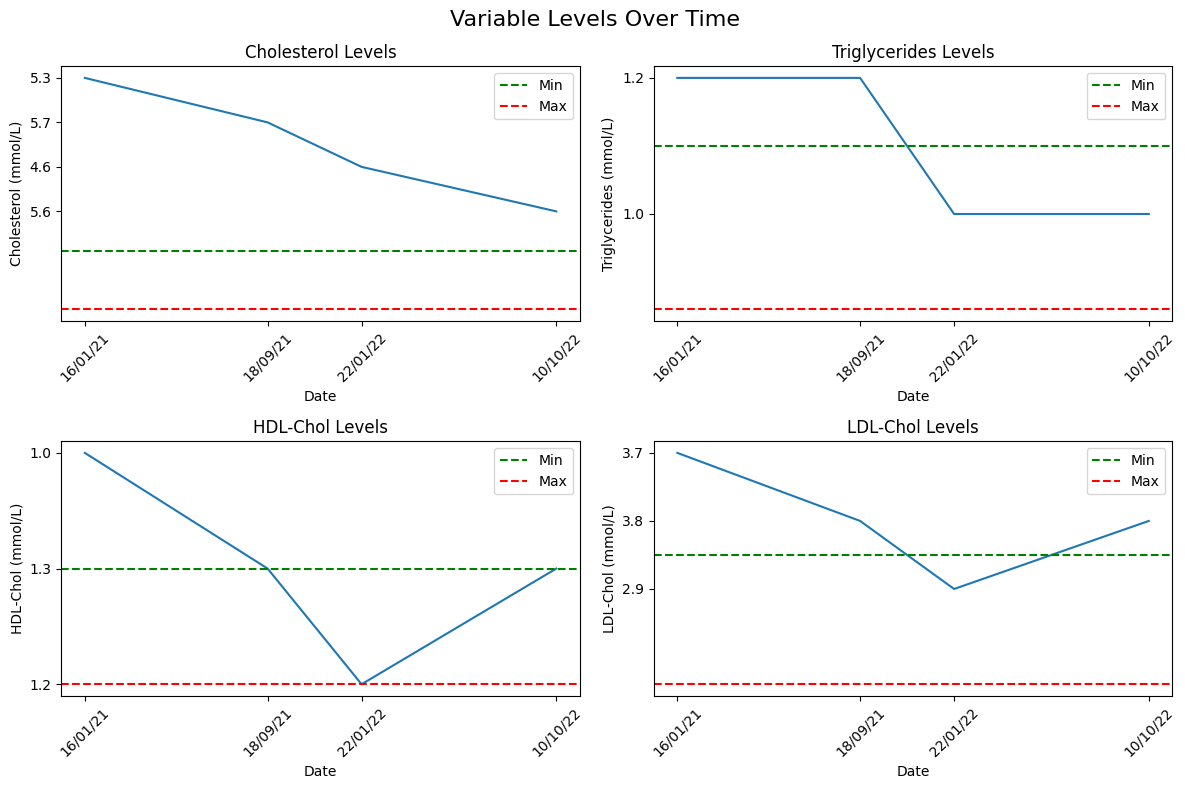

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert date strings to datetime format
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Cholesterol', 'Triglycerides', 'HDL-Chol', 'LDL-Chol']
thresholds = {'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'HDL-Chol': (1.0, 2.0),
              'LDL-Chol': (1.5, 3.4)}

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot using Seaborn's lineplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart using Seaborn's lineplot
    sns.lineplot(data=df_2, x='Date', y=var, ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Specify horizontal line types for thresholds
    if var in thresholds:
        min_val, max_val = thresholds[var]
        ax.axhline(y=min_val, color='g', linestyle='--', label='Min')
        ax.axhline(y=max_val, color='r', linestyle='--', label='Max')
        ax.legend()

    # Set the x-axis tick locations and labels
    ax.set_xticks(df_2['Date'])
    ax.set_xticklabels(df_2['Date'].dt.strftime('%d/%m/%y'), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
report2 = get_text_from_pdf_range(path_to_pdf, 6, 6)

Page 6 : 93-Jan-2023 81:82 UTC To: 61296884568 61272544546 p.l

Lumus Imaging National Capital Private Hospital

Level 2, 5 Hospital Road

tlumus rarer ies
imaging Tel; 0261958900
Fax: 0261958905

ABN: 65 080 595 937

9/01/2023 11:54 AM AEDT

Patient |D: 2856472
Dr Nikhil Jaiswal Order: 91.40313269
33 Colbee Court Exam Date: 9/01/2023 11:00 AM AEDT
PHILLIP ACT 2606

Re:  SUJATHA KONKISA - DOB: 1/12/1955
76/44 JERRABOMBERRA AVENUE NARRABUNDAH ACT 2604

ULTRASOUND-GUIDED LEFT BREASTICHEST WALL CORE BIOPSY

Clinical notes:
Previous left breast cancer

Report:

Following informed verbal and written Consent, 4 passes using a 14-gauge core biopsy needle of
the spiculated left chest wall lesion in the 12 o'clock position were performed under ultrasound
guidance using aseptic technique.

Tissue was sent to pathology for examination
No immediate post-procedure complications were encountered.
Electronically Signed by: Dr Martin Dobes

Copies to: Dharmi Somasundaram, GEETA TADIMALLA
Sonographer: 

In [ ]:
values=extract_values(report2)
save_to_csv(values, "report_2.csv")

In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_2.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Cholesterol|Triglycerides|Serum|HbAlc-NGSP|LDL|HDL).*\d')]

# Remove "F" values from the "Time" row
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace('F,', '')
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace(',F$', '')

# Remove "H" values from the "LDL-" row
filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0] = filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0].str.replace('H,', '')

# Remove "H" values from the "Cholesterol" row
filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0].str.replace('H,', '')

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Delete rows with far greater length
max_length = filtered_df[0].str.len().max()
filtered_df = filtered_df[filtered_df[0].str.len() < max_length ]

# Delete 2 rows above "Date" if it follows "Time" row
rows_to_delete = []
for i in range(1, len(filtered_df)):
    if filtered_df.iloc[i][0].startswith('Date') and filtered_df.iloc[i-1][0].startswith('Time'):
        rows_to_delete.extend([i-2, i-1])

filtered_df = filtered_df.drop(rows_to_delete)

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Combine "HDL" and "Chol." into one value
filtered_df[0] = filtered_df[0].str.replace('Time,F-Fast', 'Time')
filtered_df[0] = filtered_df[0].str.replace('HDL,Chol.,', 'HDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,Chol.,', 'LDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('HDL,cholesterol,', 'HDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,cholesterol,', 'LDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('Date,of,Service:', 'Date_of_service')

# Drop rows starting with "HDL-cholesterol" and "LDL-cholesterol"
filtered_df = filtered_df[~filtered_df[0].str.startswith('HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('LDL-cholesterol')]
# filtered_df = filtered_df[~filtered_df[0].str.startswith('Non-HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Date_of_service')]

# Reset the index again
filtered_df.reset_index(drop=True, inplace=True)

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

# Make the first row the header and replace "None" values in the first row
# filtered_df.columns = filtered_df.iloc[0]
# filtered_df.loc[0, filtered_df.loc[0].isna()] = ['Units', 'Reference']

# Remove the first row from the split dataframe
filtered_df = filtered_df[1:]

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("result_2.csv", header=True, index=False)

# Print the filtered dataframe
print(filtered_df)


Empty DataFrame
Columns: []
Index: []


In [ ]:
report3 = get_text_from_pdf_range(path_to_pdf, 7, 7)

Page 7 : KONKISA, SUJATHA

76/44 JERRABOMBERRA AVENUE, NARRABUNDAH. 2604

Birthdate: 01/12/1955 Sex: F Medicare Number: 27345216242
Your Reference: 91.40313269 Lab Reference: 91.40313269 2
Laboratory: Lumus Imaging National Capital Private Hospital
Addressee: Dr GEETA TADIMALLA Referred by: Dr Nikhil Jaiswal
Copy to:

GEETA TADIMALLA
Dharmi Somasundaram

Name of Test: US Core Biopsy Breast - Unilateral with consult
Requested: 09/01/2023 Collected: 09/01/2023 Reported: 30/01/2023
15:24

*kaKAKK ADDENDUM #1 ***4 x eR
Results have been returned from ACT Pathology:

Diagnostic Summary:
A. Left chest wall biopsy: Invasive breast carcinoma of no special type (ductal
carcinoma), predicted grade 2.

Please see the full report from ACT Pathology.

Electronically Signed by: Dr Martin Dobes
*e* KKK ORIGINAL REPORT ******4

ULTRASOUND-GUIDED LEFT BREAST/CHEST WALL CORE BIOPSY

Clinical notes:
Previous left breast cancer.

Report:

Following informed verbal and written consent, 4 passes using a 14-

In [ ]:
values=extract_values(report3)
save_to_csv(values, "report_3.csv")

In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_3.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Cholesterol|Triglycerides|Serum|HbAlc-NGSP|LDL|HDL).*\d')]

# Remove "F" values from the "Time" row
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace('F,', '')
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace(',F$', '')

# Remove "H" values from the "LDL-" row
filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0] = filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0].str.replace('H,', '')

# Remove "H" values from the "Cholesterol" row
filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0].str.replace('H,', '')

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Delete rows with far greater length
max_length = filtered_df[0].str.len().max()
filtered_df = filtered_df[filtered_df[0].str.len() < max_length ]

# Delete 2 rows above "Date" if it follows "Time" row
rows_to_delete = []
for i in range(1, len(filtered_df)):
    if filtered_df.iloc[i][0].startswith('Date') and filtered_df.iloc[i-1][0].startswith('Time'):
        rows_to_delete.extend([i-2, i-1])

filtered_df = filtered_df.drop(rows_to_delete)

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Combine "HDL" and "Chol." into one value
filtered_df[0] = filtered_df[0].str.replace('Time,F-Fast', 'Time')
filtered_df[0] = filtered_df[0].str.replace('HDL,Chol.,', 'HDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,Chol.,', 'LDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('HDL,cholesterol,', 'HDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,cholesterol,', 'LDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('Date,of,Service:', 'Date_of_service')

# Drop rows starting with "HDL-cholesterol" and "LDL-cholesterol"
filtered_df = filtered_df[~filtered_df[0].str.startswith('HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('LDL-cholesterol')]
# filtered_df = filtered_df[~filtered_df[0].str.startswith('Non-HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Date_of_service')]

# Reset the index again
filtered_df.reset_index(drop=True, inplace=True)

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

# Make the first row the header and replace "None" values in the first row
# filtered_df.columns = filtered_df.iloc[0]
# filtered_df.loc[0, filtered_df.loc[0].isna()] = ['Units', 'Reference']

# Remove the first row from the split dataframe
filtered_df = filtered_df[1:]

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("result_3.csv", header=True, index=False)

# Print the filtered dataframe
print(filtered_df)


Empty DataFrame
Columns: []
Index: []


In [ ]:
report4 = get_text_from_pdf_range(path_to_pdf, 8, 10)

Page 8 : NATA Accreditation Numbers
TCH #2508 = Calvary #15024

Requesting Dr:
Martin Alexander
Dobes

Copies to: @LABRRCCRECI|PIENTS@

Recipient’ Dr G. Tadimalia
Address: Lane Street Medical Centre
WENTWORTHVILLE NSW

Fax #: 02 9688 4500

25-Jan-2023 1:27 UIC To: 61296884580

ACT Pathology j

PO BOX 11, Woden ACT 2606

Ph (02) 5124 2930

ACTMRN:
Medicare:

Surname:
Given:
008:
Phone
Address:

61752288199 peed

*

Fax (02) 5124 2062 PAIHOLOGY

20088821
2734521624-2

Konkisa

Sujatha

1/12/1955, 67 yrs Sex: Female
6154 0023

76/44 Jerrabomberra Avenue
Narabundan ACT 2604

 

 

HISTOPATHOLOGY

 

REPORT cont. T23-00218

 

OESTROGEN RECEPTOR

% of Nuclel: 67- 100%
Predominant Intensity: Strong
EORTC Score (out of 8):8
Interpretation: Positive

PROGESTERONE RECEPTOR

% of Nuclei: 67- 100%
Predominant Intensity: Moderate
EORTC Score (out of 8):7
Interpretation: Positive

Ki67 INDEX

Nucle’ Positive: 49

Total Cell Count: 394
% of Nuclei Staining: 12.4

HER2 IHC - VENTANA CLONE 4B5
Membran

In [ ]:
values=extract_values(report4)
save_to_csv(values, "report_4.csv")

In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_4.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Cholesterol|Triglycerides|Serum|HbAlc-NGSP|LDL|HDL).*\d')]

# Remove "F" values from the "Time" row
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace('F,', '')
filtered_df.loc[filtered_df[0].str.startswith('Time'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Time'), 0].str.replace(',F$', '')

# Remove "H" values from the "LDL-" row
filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0] = filtered_df.loc[filtered_df[0].str.startswith('LDL'), 0].str.replace('H,', '')

# Remove "H" values from the "Cholesterol" row
filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0] = filtered_df.loc[filtered_df[0].str.startswith('Cholesterol'), 0].str.replace('H,', '')

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Delete rows with far greater length
max_length = filtered_df[0].str.len().max()
filtered_df = filtered_df[filtered_df[0].str.len() < max_length ]

# Delete 2 rows above "Date" if it follows "Time" row
rows_to_delete = []
for i in range(1, len(filtered_df)):
    if filtered_df.iloc[i][0].startswith('Date') and filtered_df.iloc[i-1][0].startswith('Time'):
        rows_to_delete.extend([i-2, i-1])

filtered_df = filtered_df.drop(rows_to_delete)

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Combine "HDL" and "Chol." into one value
filtered_df[0] = filtered_df[0].str.replace('Time,F-Fast', 'Time')
filtered_df[0] = filtered_df[0].str.replace('HDL,Chol.,', 'HDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,Chol.,', 'LDL-Chol,')
filtered_df[0] = filtered_df[0].str.replace('HDL,cholesterol,', 'HDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('LDL,cholesterol,', 'LDL-cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('Date,of,Service:', 'Date_of_service')

# Drop rows starting with "HDL-cholesterol" and "LDL-cholesterol"
filtered_df = filtered_df[~filtered_df[0].str.startswith('HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('LDL-cholesterol')]
# filtered_df = filtered_df[~filtered_df[0].str.startswith('Non-HDL-cholesterol')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Date_of_service')]

# Reset the index again
filtered_df.reset_index(drop=True, inplace=True)

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

# Make the first row the header and replace "None" values in the first row
# filtered_df.columns = filtered_df.iloc[0]
# filtered_df.loc[0, filtered_df.loc[0].isna()] = ['Units', 'Reference']

# Remove the first row from the split dataframe
filtered_df = filtered_df[1:]

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("result_4.csv", header=True, index=False)

# Print the filtered dataframe
print(filtered_df)


Empty DataFrame
Columns: []
Index: []


In [ ]:
report5 = get_text_from_pdf_range(path_to_pdf, 11, 17)

Page 11 : KONKISA, SUJATHA

20 DEMPSEY ST, DENHAM COURT. 2565

Phone: 61540023

Birthdate: 01/12/1955 Sex: F Medicare Number: 2734521624

Your Reference: 00126939 Lab Reference: 23-21907242-FBE-0
Laboratory: Laverty Pathology

Addressee: DR ESHWAR MADAS Referred by: DR ESHWAR MADAS

Name of Test: HAEMATOLOGY (FBE-0)

Requested: 13/02/2023 Collected: 16/02/2023 Reported: 16/02/2023
18:35

Clinical notes: 3monthly Checkup.

Clinical Notes : 3monthly Checkup.

HAEMATOLOGY

Request Number 22846015 20838122 21907242
Date Collected 19 Nov 20 16 Nov 22 16 Feb 23
Time Collected 08:15 07:30 08:57
Specimen Type: EDTA
Hb (115-165) g/L 125 123 121
Het (0.34-0.47) 0.40 0.40 0.38
RCC (3.9-5.8) x10°12 = «/L 4.6 4.5 4.3
MCV (79-99) £L 87 89 90
MCH (27-34) pg 27 28 29
MCHC (320-360) g/L 316 311 315
RDW (10.0-17.0) % 14.2 14.9 13.6
wBc (4.0-11.0) x10*°9 /L 6.3 6.4 6.3
Neut (2.0-7.5) x10*°9 =/L 3.6 2.5 3.8
Lymph (1.0-4.0) xl0*9 = /L 2.1 3.2 2.0
Mono (0.2-1.0) xl0*9 = /L 0.5 0.5 0.4
Eos (< 0.7) x10*°9) ~/

In [ ]:
values=extract_values(report5)
save_to_csv(values, "report_5.csv")

In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_5.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Chol|Trig|HbA1c-NGSP|HbA1c-IFCC|LDL|HDL|Non-HDL).*\d')]

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Combine "HDL" and "Chol." into one value
filtered_df[0] = filtered_df[0].str.replace('Date,Collected,19,Nov,20,16,Nov,22,16,Feb,23', 'Date,Reference,Units,19/11/20,16/11/22,16/02/23')
filtered_df[0] = filtered_df[0].str.replace('Time,Collected', 'Time,,')
filtered_df[0] = filtered_df[0].str.replace('Non-HDL,\(\<,3.4\)', 'Non-HDL,(<3.4)')
filtered_df[0] = filtered_df[0].str.replace('Chol,', 'Cholesterol,')
filtered_df[0] = filtered_df[0].str.replace('Trig,', 'Triglycerides,')

# Remove "&" values from the "HbA1c-NGSP" row
filtered_df.loc[filtered_df[0].str.startswith('HbA1c-NGSP'), 0] = filtered_df.loc[filtered_df[0].str.startswith('HbA1c-NGSP'), 0].str.replace('&', '')

# Combine "HDL" and "Chol." into one value
filtered_df[0] = filtered_df[0].str.replace('Chol/HDL\(<4.5\)', 'Chol/HDL,(<4.5)')

# Reset the index again
filtered_df.reset_index(drop=True, inplace=True)

# Regular expression pattern
pattern = r'Chol/HDL\(<,(\d+\.\d+)\)'

# Replace the pattern with the desired format
filtered_df[0] = filtered_df[0].str.replace(pattern, r'Chol/HDL,(<\1),')

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

# print(filtered_df)

df_3 = filtered_df.iloc[:, [0, 3, 4, 5]].T

df_3.columns = df_3.iloc[0]

# Remove the first row from the split dataframe
df_3 = df_3[1:]

df_3.reset_index(drop=True, inplace=True)

df_3['Date'] = pd.to_datetime(df_3['Date'])

print(df_3)

# Make the first row the header
filtered_df.columns = filtered_df.iloc[0]

# Remove the first row from the split dataframe
filtered_df = filtered_df[1:]

# Store the filtered dataframe to CSV without headers
filtered_df.to_csv("result_5.csv", header=True, index=False)

# Print the filtered dataframe
# print(filtered_df)


0       Date   Time HbA1c-NGSP HbA1c-IFCC Cholesterol Triglycerides  HDL  LDL  \
0 2020-11-19  08:15        6.8         51         4.7           1.5  1.0  3.0   
1 2022-11-16  07:30        5.7         39         4.5           1.2  1.2  2.8   
2 2023-02-16  08:57        5.7         39         4.1           1.0  1.3  2.3   

0 Non-HDL Chol/HDL  
0     3.7      4.7  
1     3.3      3.8  
2     2.8      3.2  


In [ ]:
import pandas as pd
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a dataframe
df = pd.read_csv("/content/report_5.csv", sep="\t", header=None)

# Filter rows based on the condition
filtered_df = df[df[0].str.match(r'(Date|Time|Na|K|Cl|HCO3|An|Urea|Creat|eGFR|Urate|Bili|AST|ALT|GGT|Alk|Protein|Albumin|Glob|Ca|Corr|PO4).*\d')]

# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()

filtered_df[0] = filtered_df[0].str.replace('Date,Collected,19,Nov,20,16,Nov,22,16,Feb,23', 'Date,Reference,Units,19/11/20,16/11/22,16/02/23')
filtered_df[0] = filtered_df[0].str.replace('Time,Collected,08:15', 'Time,,,08:15')
filtered_df[0] = filtered_df[0].str.replace('Na,', 'Sodium,')
filtered_df[0] = filtered_df[0].str.replace('K,', 'Potassium,')
filtered_df[0] = filtered_df[0].str.replace('HCO3,', 'Bicarbonate,')
filtered_df[0] = filtered_df[0].str.replace('Ca,', 'Calcium,')
filtered_df[0] = filtered_df[0].str.replace('PO4,', 'Phosphate,')
filtered_df[0] = filtered_df[0].str.replace('An,Gap', 'An Gap')
filtered_df[0] = filtered_df[0].str.replace('Alk,Phos', 'Alk Phos')
filtered_df[0] = filtered_df[0].str.replace('Corr,Ca', 'Corr Ca')
filtered_df[0] = filtered_df[0].str.replace(',>,90,', ',>90,')
filtered_df[0] = filtered_df[0].str.replace('Corr Ca,\(2.10-2.60\)', 'Corr Ca,(2.10-2.60),')
filtered_df[0] = filtered_df[0].str.replace(',\(<,', ',(<')

# Drop rows starting with "HDL-cholesterol" and "LDL-cholesterol"
filtered_df = filtered_df[~filtered_df[0].str.startswith('Clinical')]
filtered_df = filtered_df[~filtered_df[0].str.startswith('Name')]

# Delete rows with far greater length
max_length = filtered_df[0].str.len().max()
filtered_df = filtered_df[filtered_df[0].str.len() < max_length ]

# Reset the index of the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

# Split rows separated by commas into a dataframe
filtered_df = filtered_df[0].str.split(',', expand=True)

df_5 = filtered_df.iloc[:, [0, 3, 4, 5]].T

df_5.columns = df_5.iloc[0]

# Remove the first row from the split dataframe
df_5 = df_5[1:]

df_5.reset_index(drop=True, inplace=True)

# df_5 = df_5.replace('None', '', inplace=True)

df_5['Date'] = pd.to_datetime(df_5['Date'])

df_5['eGFR'] = df_5['eGFR'].str.replace(r'[><]', '')
df_5['ALT'] = df_5['ALT'].str.replace(r'[><]', '')

print(df_5)

print(filtered_df)


0       Date   Time Sodium Potassium Bicarbonate An Gap Urea Creat  eGFR  \
0 2020-11-19  08:15    141       4.3          26     13  4.6    60    84   
1 2022-11-16  07:30    140       4.3          24     20  5.3    65    78   
2 2023-02-16  08:57    142       4.1          24     22  6.0    70  None   

0 Urate  ... AST ALT GGT Alk Phos Protein Albumin Glob Calcium Corr Calcium  \
0  0.32  ...  11   7  11       72      66      39   27    2.43         2.59   
1  0.30  ...  16   9   8       64      70      42   28    2.57         None   
2  None  ...  14   7  10       67      68      42   26    None         None   

0 Phosphate  
0      1.10  
1      1.01  
2      None  

[3 rows x 21 columns]
               0               1       2         3         4         5
0           Date       Reference   Units  19/11/20  16/11/22  16/02/23
1           Time                             08:15     07:30     08:57
2         Sodium       (135-145)  mmol/L       141       140       142
3      Potassiu

In [ ]:
df_5

,Date,Time,Sodium,Potassium,Bicarbonate,An Gap,Urea,Creat,eGFR,Urate,...,AST,ALT,GGT,Alk Phos,Protein,Albumin,Glob,Calcium,Corr Calcium,Phosphate
0,2020-11-19,08:15,141,4.3,26,13,4.6,60,84,0.32,...,11,7,11,72,66,39,27,2.43,2.59,1.10
1,2022-11-16,07:30,140,4.3,24,20,5.3,65,78,0.30,...,16,9,8,64,70,42,28,2.57,None,1.01
2,2023-02-16,08:57,142,4.1,24,22,6.0,70,None,None,...,14,7,10,67,68,42,26,None,None,None


In [ ]:
import pandas as pd

# Read the two CSV files into dataframes
df1 = pd.read_csv("result_1.csv")
df2 = pd.read_csv("result_5.csv")

# Merge the dataframes based on the 'Date' column
merged_df = df1.merge(df2, on='Date', how='outer')

# Merge the "Units" and "Reference" columns
merged_df['Reference'] = merged_df['Reference_x'].fillna('') + merged_df['Reference_y'].fillna('')
merged_df['Units'] = merged_df['Units_x'].fillna('') + merged_df['Units_y'].fillna('')

# Drop the unnecessary columns
merged_df = merged_df.drop(['Units_x', 'Reference_x', 'Units_y', 'Reference_y'], axis=1)

# Print the updated merged dataframe
merged_df

,Date,16/01/21,18/09/21,22/01/22,10/10/22,19/11/20,16/11/22,16/02/23,Reference,Units
0,Time,09:10,09:03,10:14,09:02,08:15,07:30,08:57,,
1,Cholesterol,5.3,5.7,4.6,5.6,4.7,4.5,4.1,(<5.5(3.9-5.2),mmol/Lmmol/L
2,Triglycerides,1.2,1.2,1.0,1.0,1.5,1.2,1.0,(<2.0)(0.5-1.7),mmol/Lmmol/L
3,HDL-Chol,1.0,1.3,1.2,1.3,NaN,NaN,NaN,(>1.2),mmol/L
4,LDL-Chol,3.7,3.8,2.9,3.8,NaN,NaN,NaN,(<3.0,mmol/L
5,HbA1c-NGSP,NaN,NaN,NaN,NaN,6.8,5.7,5.7,(4.0-6.0),
6,HbA1c-IFCC,NaN,NaN,NaN,NaN,51,39,39,(20-42),mmol/m
7,HDL,NaN,NaN,NaN,NaN,1.0,1.2,1.3,(1.0-2.0),mmol/L
8,LDL,NaN,NaN,NaN,NaN,3.0,2.8,2.3,(1.5-3.4),mmol/L
9,Non-HDL,NaN,NaN,NaN,NaN,3.7,3.3,2.8,(<3.4),mmol/L


In [ ]:
import pandas as pd

# Read the two CSV files into dataframes
# df1 = pd.read_csv("result_1.csv")
# df2 = pd.read_csv("result_5.csv")

# Merge the dataframes based on the 'Date' column
merged_df = df_2.merge(df_3, on='Date', how='outer')

merged_df['Time'] = merged_df['Time_x'].combine_first(merged_df['Time_y'])
merged_df['Cholesterol'] = merged_df['Cholesterol_x'].combine_first(merged_df['Cholesterol_y'])
merged_df['Triglycerides'] = merged_df['Triglycerides_x'].combine_first(merged_df['Triglycerides_y'])

# Merge "HDL-Chol" and "HDL" columns
merged_df['HDL'] = merged_df['HDL-Chol'].fillna(merged_df['HDL'])

# Merge "LDL-Chol" and "LDL" columns
merged_df['LDL'] = merged_df['LDL-Chol'].fillna(merged_df['LDL'])

merged_df = merged_df[['Date', 'Time', 'Cholesterol', 'Triglycerides', 'HDL', 'LDL', 'HbA1c-NGSP', 'HbA1c-IFCC', 'Non-HDL', 'Chol/HDL']]

# Convert the 'Date' column to date type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Print the updated merged dataframe
merged_df = merged_df.sort_values('Date')

merged_df.reset_index(drop=True, inplace=True)

# Save the merged dataframe to a CSV file
merged_df.to_csv("merged_data_1.csv", index=False)

merged_df

,Date,Time,Cholesterol,Triglycerides,HDL,LDL,HbA1c-NGSP,HbA1c-IFCC,Non-HDL,Chol/HDL
0,2020-11-19,08:15,4.7,1.5,1.0,3.0,6.8,51,3.7,4.7
1,2021-01-16,09:10,5.3,1.2,1.0,3.7,NaN,NaN,NaN,NaN
2,2021-09-18,09:03,5.7,1.2,1.3,3.8,NaN,NaN,NaN,NaN
3,2022-01-22,10:14,4.6,1.0,1.2,2.9,NaN,NaN,NaN,NaN
4,2022-10-10,09:02,5.6,1.0,1.3,3.8,NaN,NaN,NaN,NaN
5,2022-11-16,07:30,4.5,1.2,1.2,2.8,5.7,39,3.3,3.8
6,2023-02-16,08:57,4.1,1.0,1.3,2.3,5.7,39,2.8,3.2


In [ ]:
merged_df

,Date,Time,Cholesterol,Triglycerides,HDL,LDL,HbA1c-NGSP,HbA1c-IFCC,Non-HDL,Chol/HDL
0,2020-11-19,08:15,4.7,1.5,1.0,3.0,6.8,51,3.7,4.7
1,2021-01-16,09:10,5.3,1.2,1.0,3.7,NaN,NaN,NaN,NaN
2,2021-09-18,09:03,5.7,1.2,1.3,3.8,NaN,NaN,NaN,NaN
3,2022-01-22,10:14,4.6,1.0,1.2,2.9,NaN,NaN,NaN,NaN
4,2022-10-10,09:02,5.6,1.0,1.3,3.8,NaN,NaN,NaN,NaN
5,2022-11-16,07:30,4.5,1.2,1.2,2.8,5.7,39,3.3,3.8
6,2023-02-16,08:57,4.1,1.0,1.3,2.3,5.7,39,2.8,3.2


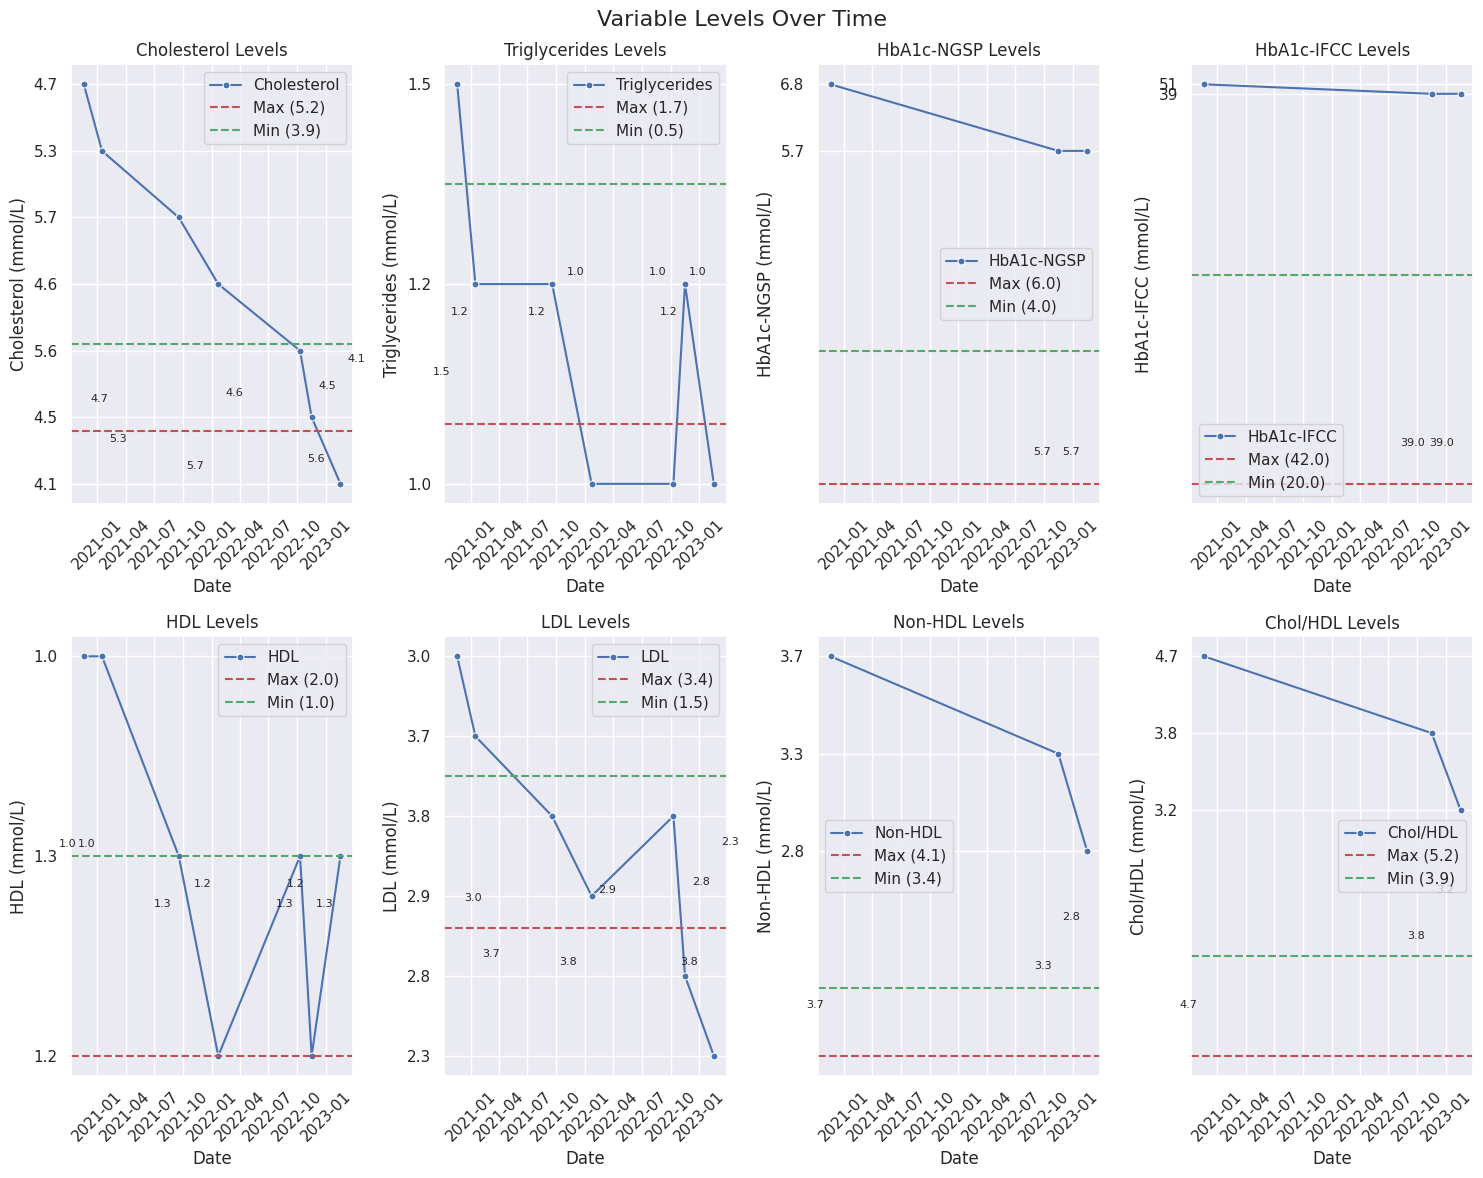

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

# Convert date strings to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Cholesterol', 'Triglycerides', 'HbA1c-NGSP', 'HbA1c-IFCC', 'HDL',
       'LDL', 'Non-HDL', 'Chol/HDL']
thresholds = {'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'HDL': (1.0, 2.0),
              'LDL': (1.5, 3.4),
              'HbA1c-NGSP': (4.0, 6.0),
              'HbA1c-IFCC': (20, 42),
              'Non-HDL': (3.4, 4.1),
              'Chol/HDL': (3.9, 5.2)}

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot using Seaborn's lineplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart using Seaborn's lineplot with markers and labels
    sns.lineplot(data=merged_df, x='Date', y=var, ax=ax, marker='o', markersize=5, label=var)

    # Convert the marker values column to numeric type
    merged_df[var] = pd.to_numeric(merged_df[var], errors='coerce')

    # Annotate marker values
    for x_val, y_val in zip(merged_df['Date'], merged_df[var]):
        if not pd.isnull(y_val):
            if merged_df[var].diff().iloc[1] > 0:
                xytext = (5, -5)
                ha = 'left'
            else:
                xytext = (-5, 5)
                ha = 'right'
            ax.annotate(f'{y_val:.1f}', (x_val, y_val), xytext=xytext, textcoords='offset points', ha=ha, va='bottom', fontsize=8)

    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Specify horizontal line types for thresholds
    if var in thresholds:
      min_val, max_val = thresholds[var]
      ax.axhline(y=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
      ax.axhline(y=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
      ax.legend()

    # Configure x-axis tick locations and labels
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


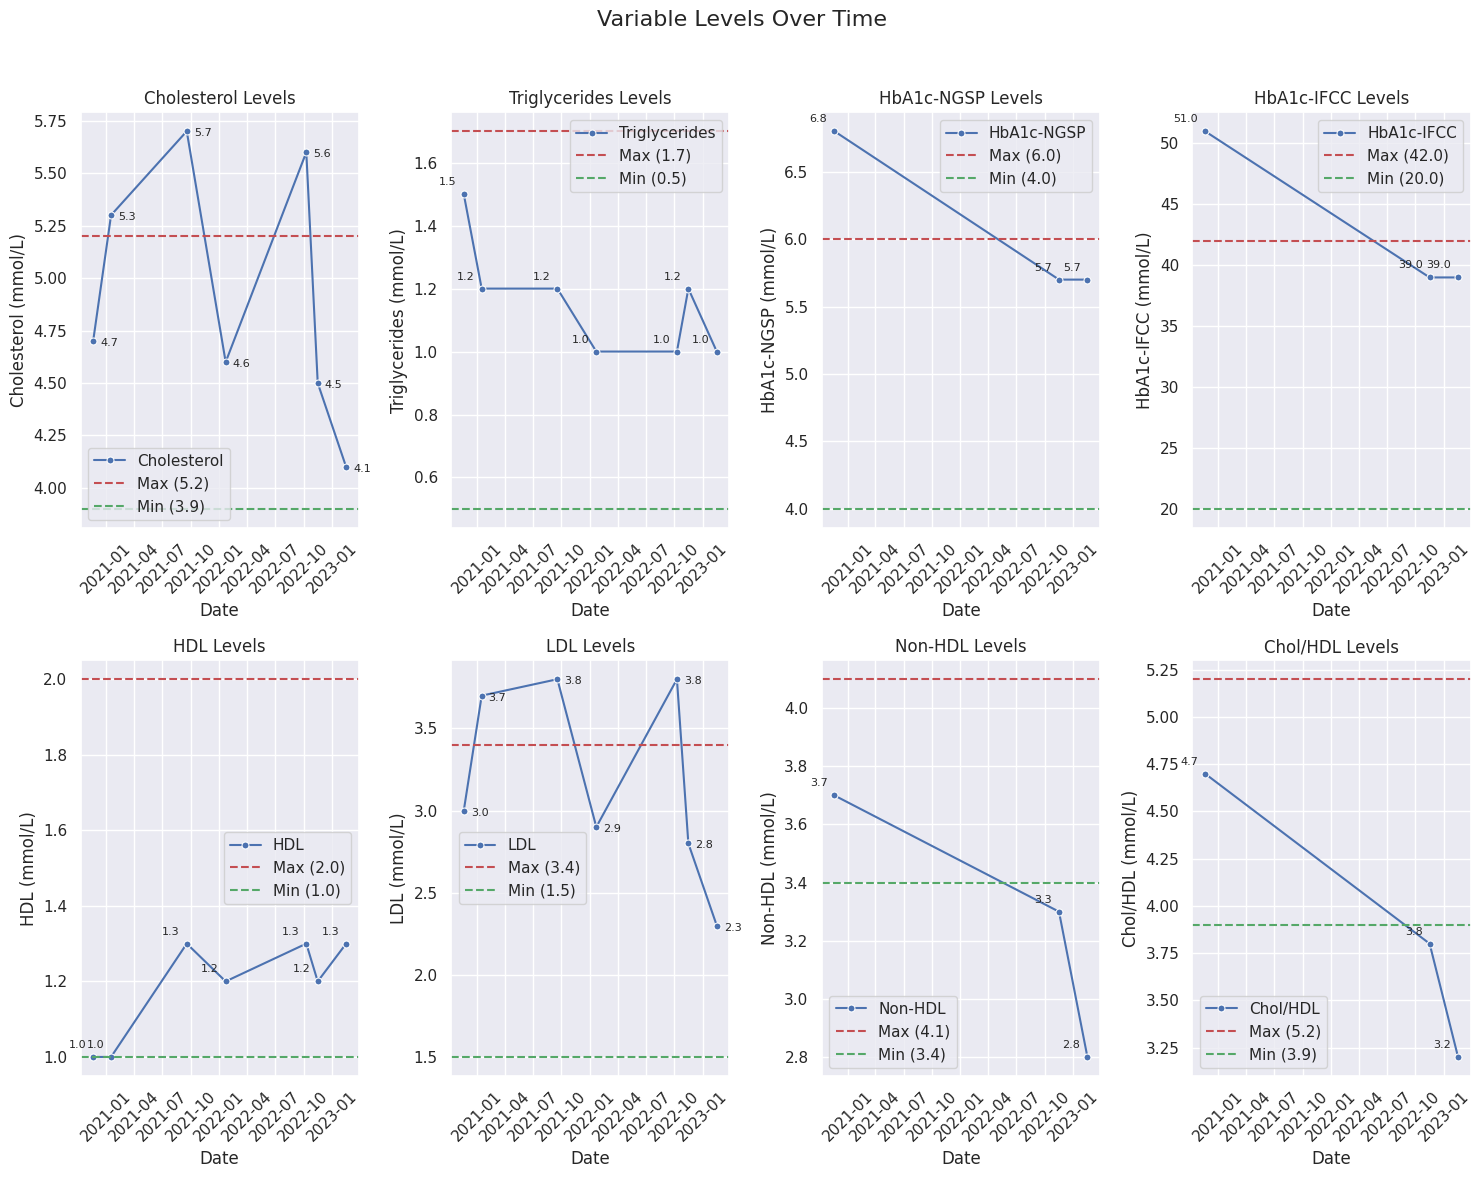

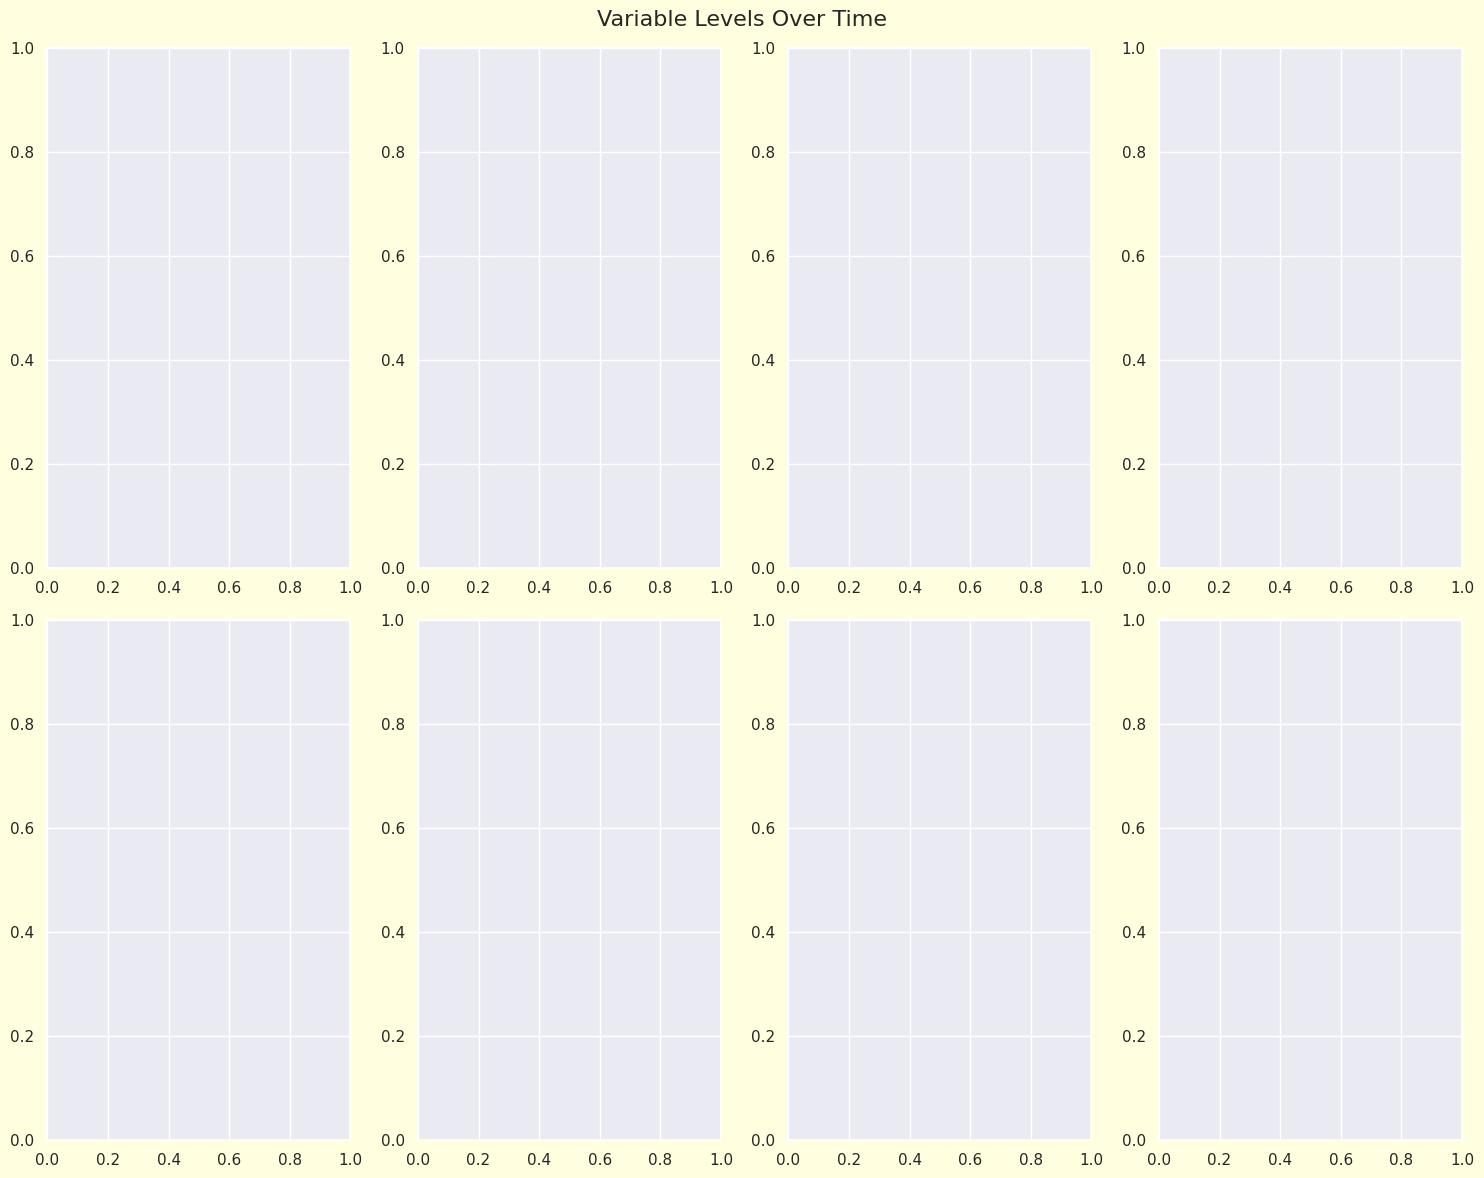

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

# Convert date strings to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Cholesterol', 'Triglycerides', 'HbA1c-NGSP', 'HbA1c-IFCC', 'HDL',
       'LDL', 'Non-HDL', 'Chol/HDL']
thresholds = {'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'HDL': (1.0, 2.0),
              'LDL': (1.5, 3.4),
              'HbA1c-NGSP': (4.0, 6.0),
              'HbA1c-IFCC': (20, 42),
              'Non-HDL': (3.4, 4.1),
              'Chol/HDL': (3.9, 5.2)}

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot using Seaborn's lineplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart using Seaborn's lineplot with markers and labels
    sns.lineplot(data=merged_df, x='Date', y=var, ax=ax, marker='o', markersize=5, label=var)

    # Convert the marker values column to numeric type
    merged_df[var] = pd.to_numeric(merged_df[var], errors='coerce')

    # Annotate marker values
    for x_val, y_val in zip(merged_df['Date'], merged_df[var]):
        if not pd.isnull(y_val):
            if merged_df[var].diff().iloc[1] > 0:
                xytext = (5, -5)
                ha = 'left'
            else:
                xytext = (-5, 5)
                ha = 'right'
            ax.annotate(f'{y_val:.1f}', (x_val, y_val), xytext=xytext, textcoords='offset points', ha=ha, va='bottom', fontsize=8)

    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Specify horizontal line types for thresholds
    if var in thresholds:
      min_val, max_val = thresholds[var]
      ax.axhline(y=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
      ax.axhline(y=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
      ax.legend()

    # Configure x-axis tick locations and labels
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

# Assuming you have already loaded 'merged_df' and defined 'variables' and 'thresholds'

# Convert date strings to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%y')

# Create a list of variables to plot
# (omitted for brevity)

# Calculate the number of rows and columns for the subplots
# (omitted for brevity)

# Create subplots in a grid layout with colorful background
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), facecolor='lightyellow')  # You can choose any color you like
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot using Seaborn's lineplot
# (omitted for brevity)

# Remove any empty subplots
# (omitted for brevity)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

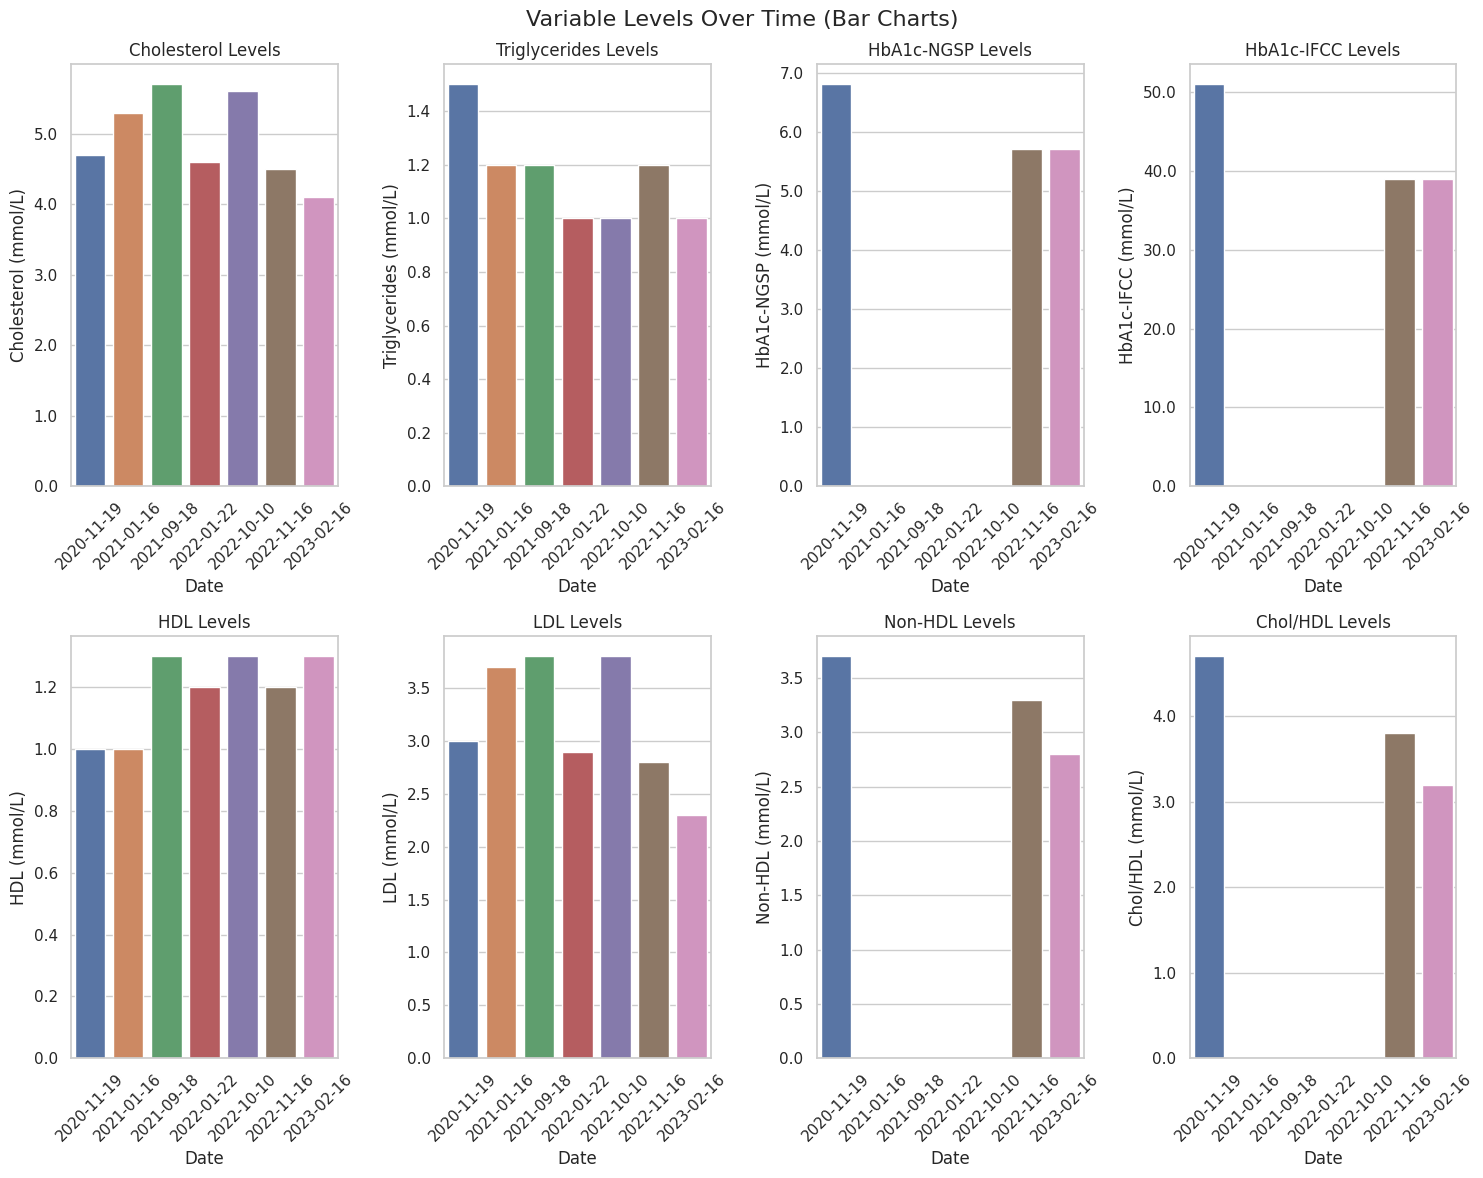

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

sns.set(style="whitegrid")

# Read the merged DataFrame from the CSV file
merged_df = pd.read_csv("merged_data_1.csv")

# Convert the 'Date' column to datetime format
# merged_df['Date'] = pd.to_datetime(merged_df['Date'], infer_datetime_format=True)

# Define the list of variables for the bar charts
variables = ['Cholesterol', 'Triglycerides', 'HbA1c-NGSP', 'HbA1c-IFCC', 'HDL',
             'LDL', 'Non-HDL', 'Chol/HDL']

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Variable Levels Over Time (Bar Charts)', fontsize=16)

# Plot bar charts for each variable using Seaborn's barplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Create the bar chart using Seaborn's barplot
    sns.barplot(data=merged_df, x='Date', y=var, ci=None, ax=ax)

    # Convert the y-axis labels to 1 decimal place
    ax.yaxis.set_major_formatter('{:.1f}'.format)

    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Format x-axis tick labels to display only date (without time)
    # date_format = DateFormatter("%Y-%m-%d")
    # ax.xaxis.set_major_formatter(date_format)

    # Rotate x-axis tick labels for better visibility
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


In [ ]:
merged_df['Date']

0    2020-11-19
1    2021-01-16
2    2021-09-18
3    2022-01-22
4    2022-10-10
5    2022-11-16
6    2023-02-16
Name: Date, dtype: object

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7 non-null      object 
 1   Time           7 non-null      object 
 2   Cholesterol    7 non-null      float64
 3   Triglycerides  7 non-null      float64
 4   HDL            7 non-null      float64
 5   LDL            7 non-null      float64
 6   HbA1c-NGSP     3 non-null      float64
 7   HbA1c-IFCC     3 non-null      float64
 8   Non-HDL        3 non-null      float64
 9   Chol/HDL       3 non-null      float64
dtypes: float64(8), object(2)
memory usage: 688.0+ bytes


In [ ]:
import pandas as pd

# Merge the dataframes based on the 'Date' column
merged_df = df_4.merge(df_5, on='Date', how='outer')

merged_df['Time'] = merged_df['Time_x'].combine_first(merged_df['Time_y'])
merged_df['Sodium'] = merged_df['Sodium_x'].combine_first(merged_df['Sodium_y'])
merged_df['Potassium'] = merged_df['Potassium_x'].combine_first(merged_df['Potassium_y'])
merged_df['Bicarbonate'] = merged_df['Bicarbonate_x'].combine_first(merged_df['Bicarbonate_y'])
merged_df['Corr Calcium'] = merged_df['Corr Calcium_x'].combine_first(merged_df['Corr Calcium_y'])
merged_df['Calcium'] = merged_df['Calcium_x'].combine_first(merged_df['Calcium_y'])
merged_df['Phosphate'] = merged_df['Phosphate_x'].combine_first(merged_df['Phosphate_y'])
merged_df['Urea'] = merged_df['Urea_x'].combine_first(merged_df['Urea_y'])
merged_df['eGFR'] = merged_df['eGFR_x'].combine_first(merged_df['eGFR_y'])
merged_df['Urate'] = merged_df['Urate_x'].combine_first(merged_df['Urate_y'])
merged_df['Albumin'] = merged_df['Albumin_x'].combine_first(merged_df['Albumin_y'])
merged_df['AST'] = merged_df['AST_x'].combine_first(merged_df['AST_y'])
merged_df['ALT'] = merged_df['ALT_x'].combine_first(merged_df['ALT_y'])
merged_df['GGT'] = merged_df['GGT_x'].combine_first(merged_df['GGT_y'])

# Drop the columns ending with "_x" and "_y"
merged_df.drop(columns=['Time_x', 'Time_y', 'Urea_x', 'Urea_y', 'eGFR_x', 'eGFR_y',
                        'Urate_x', 'Urate_y', 'Albumin_x', 'Albumin_y', 'AST_x',
                        'AST_y', 'ALT_x', 'ALT_y', 'GGT_x', 'GGT_y', 'Sodium_x', 'Sodium_y',
                        'Potassium_x', 'Potassium_y', 'Bicarbonate_x', 'Bicarbonate_y',
                        'Corr Calcium_x', 'Corr Calcium_y', 'Calcium_x', 'Calcium_y', 'Phosphate_x', 'Phosphate_y'], inplace=True)

merged_df = merged_df[['Date', 'Time', 'Urea', 'eGFR', 'Urate', 'Albumin', 'AST', 'ALT', 'GGT', 'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'Calcium', 'Corr Calcium', 'Phosphate', 'Bili.Total', 'ALP', 'LD',
       'Total Protein', 'Globulin', 'An Gap', 'Creat',
       'Bili', 'Alk Phos', 'Protein', 'Glob']]

# Convert all columns except the first two to float
merged_df[merged_df.columns[2:]] = merged_df[merged_df.columns[2:]].astype(float)

# Save the merged dataframe to a CSV file
merged_df.to_csv("merged_data_2.csv", index=False)

merged_df

,Date,Time,Urea,eGFR,Urate,Albumin,AST,ALT,GGT,Sodium,...,ALP,LD,Total Protein,Globulin,An Gap,Creat,Bili,Alk Phos,Protein,Glob
0,2021-01-16,09:10,3.0,90.0,0.30,40.0,14.0,8.0,11.0,141.0,...,64.0,130.0,71.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-18,09:03,4.4,88.0,0.30,37.0,15.0,8.0,11.0,136.0,...,77.0,133.0,68.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10,09:02,5.2,76.0,0.29,43.0,17.0,6.0,12.0,140.0,...,76.0,151.0,71.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-19,08:15,4.6,84.0,0.32,39.0,11.0,7.0,11.0,141.0,...,NaN,NaN,NaN,NaN,13.0,60.0,5.0,72.0,66.0,27.0
4,2022-11-16,07:30,5.3,78.0,0.30,42.0,16.0,9.0,8.0,140.0,...,NaN,NaN,NaN,NaN,20.0,65.0,4.0,64.0,70.0,28.0
5,2023-02-16,08:57,6.0,NaN,NaN,42.0,14.0,7.0,10.0,142.0,...,NaN,NaN,NaN,NaN,22.0,70.0,6.0,67.0,68.0,26.0


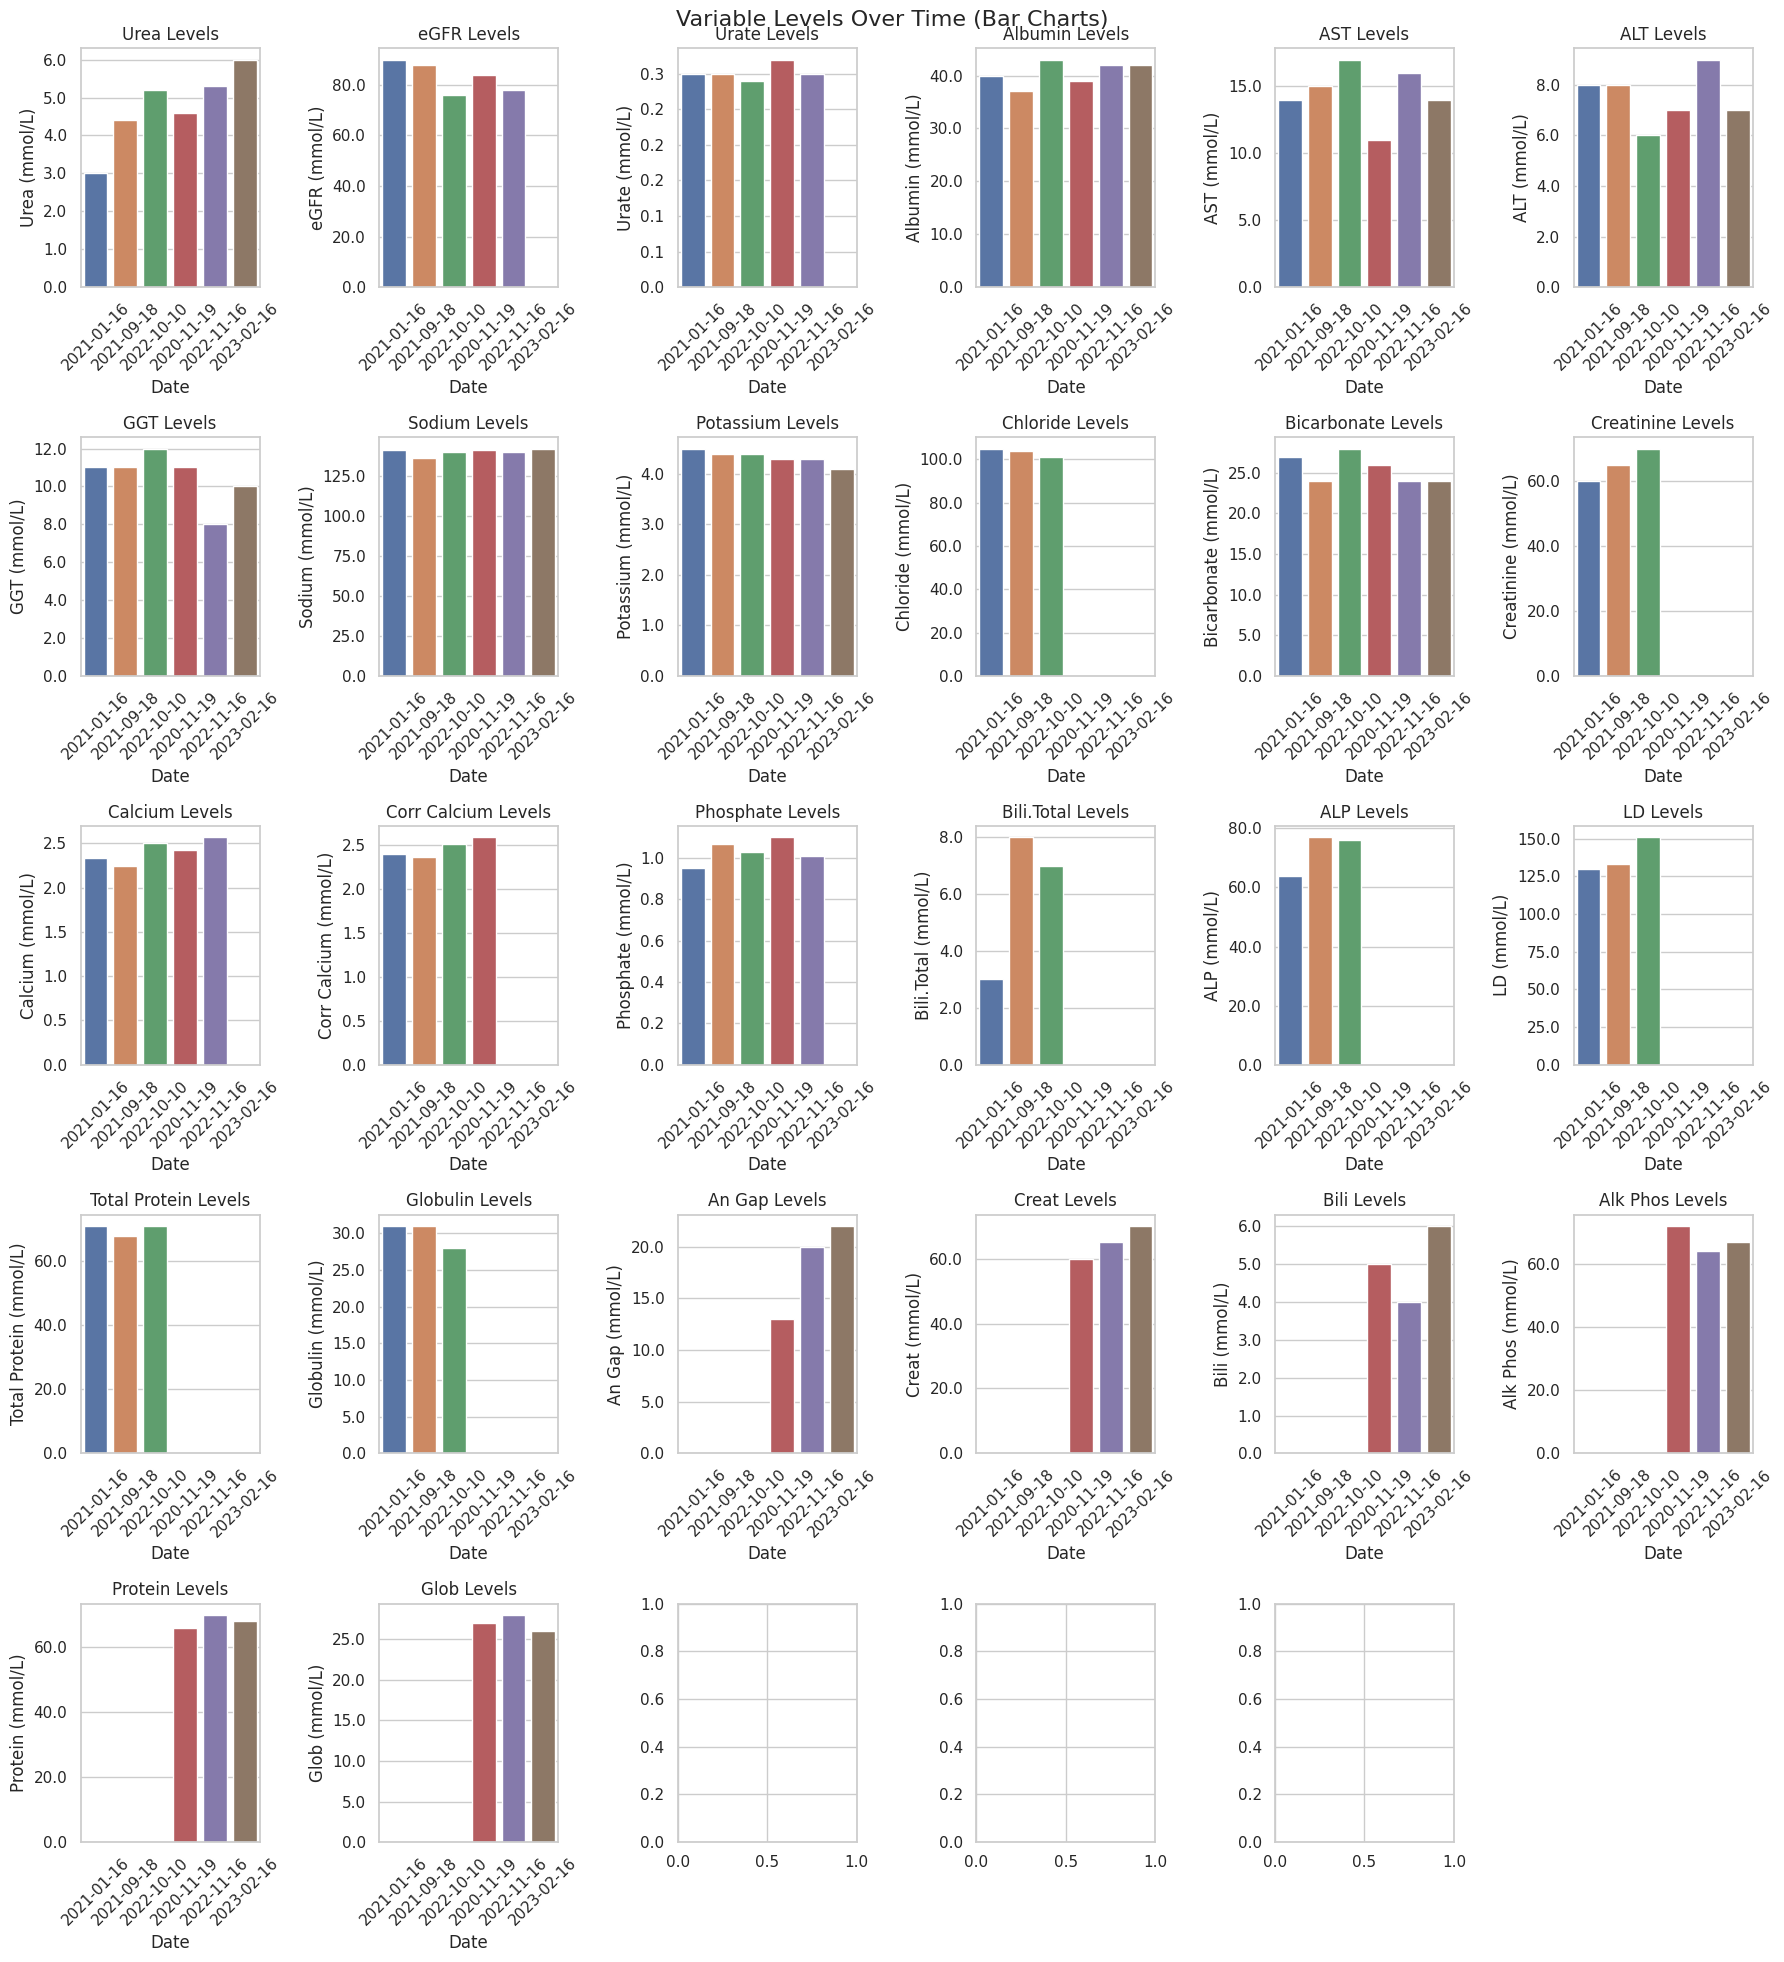

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

sns.set(style="whitegrid")

# Read the merged DataFrame from the CSV file
merged_df = pd.read_csv("merged_data_2.csv")

# Convert the 'Date' column to datetime format
# merged_df['Date'] = pd.to_datetime(merged_df['Date'], infer_datetime_format=True)

# Define the list of variables for the bar charts
variables = ['Urea', 'eGFR', 'Urate', 'Albumin', 'AST', 'ALT', 'GGT', 'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'Calcium', 'Corr Calcium', 'Phosphate', 'Bili.Total', 'ALP', 'LD',
       'Total Protein', 'Globulin', 'An Gap', 'Creat',
       'Bili', 'Alk Phos', 'Protein', 'Glob']

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
# num_cols = 3
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 20))
fig.suptitle('Variable Levels Over Time (Bar Charts)', fontsize=16)

# Plot bar charts for each variable using Seaborn's barplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Create the bar chart using Seaborn's barplot
    sns.barplot(data=merged_df, x='Date', y=var, ci=None, ax=ax)

    # Convert the y-axis labels to 1 decimal place
    ax.yaxis.set_major_formatter('{:.1f}'.format)

    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Format x-axis tick labels to display only date (without time)
    # date_format = DateFormatter("%Y-%m-%d")
    # ax.xaxis.set_major_formatter(date_format)

    # Rotate x-axis tick labels for better visibility
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


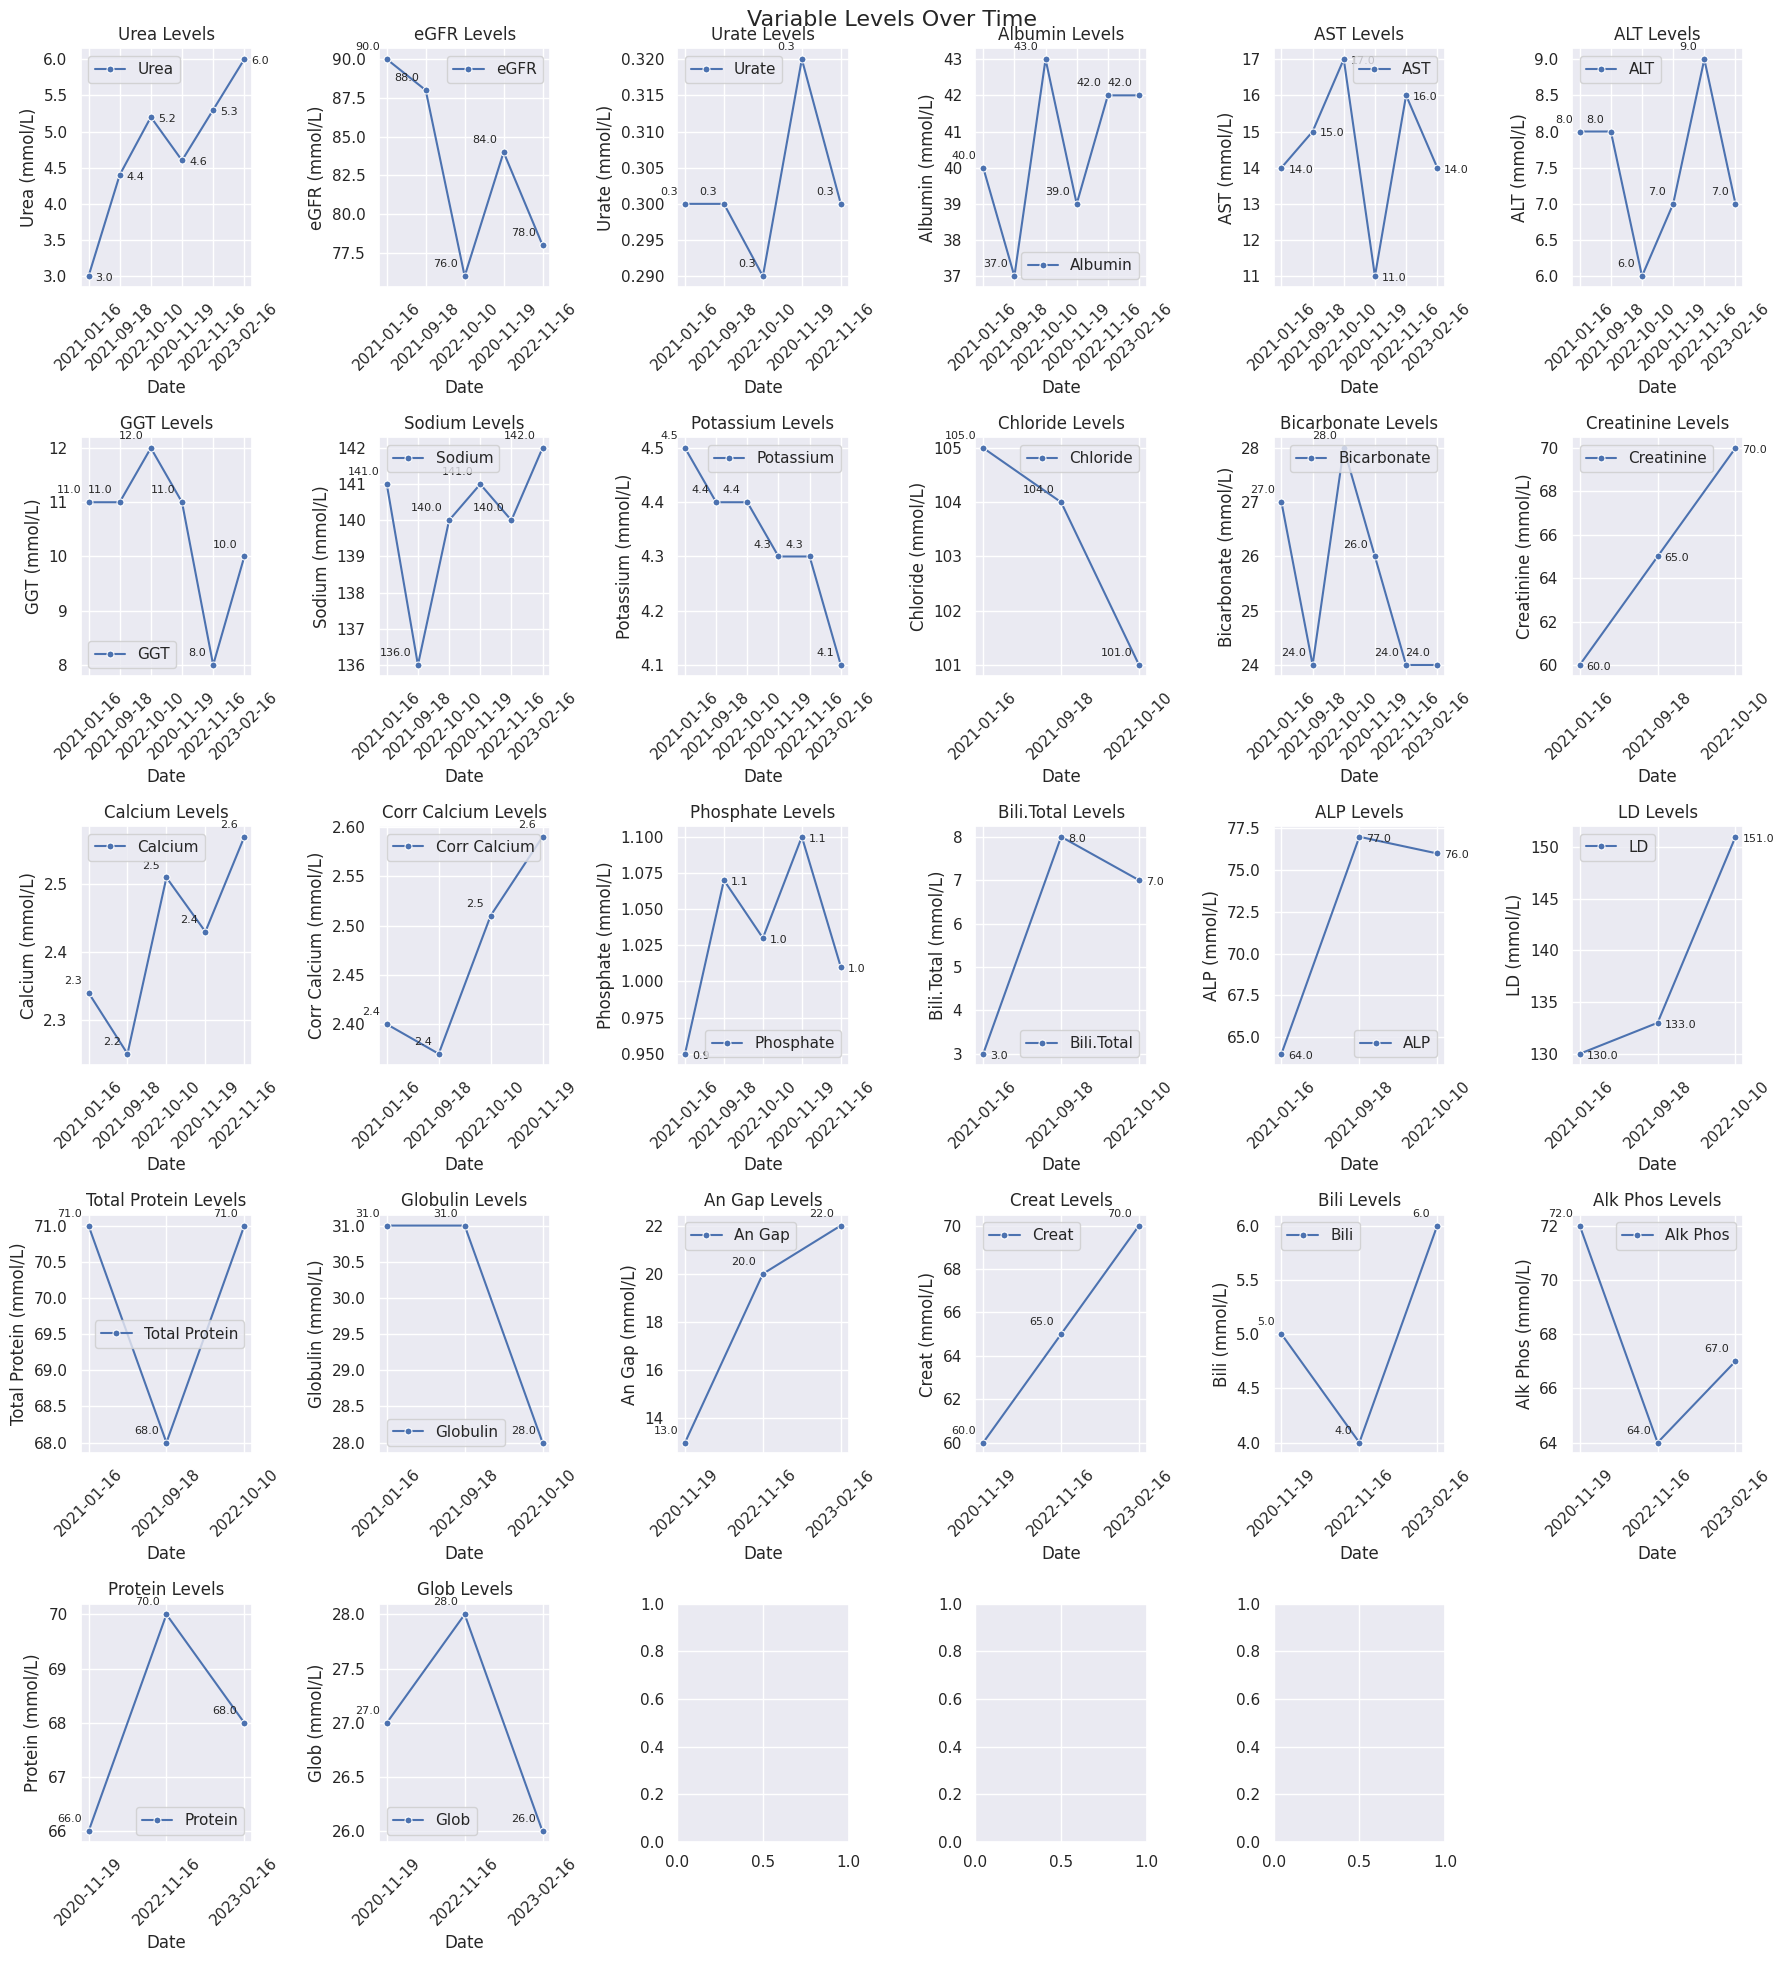

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

merged_df = pd.read_csv("merged_data_2.csv")

# Create a list of variables to plot
variables = ['Urea', 'eGFR', 'Urate', 'Albumin', 'AST', 'ALT', 'GGT', 'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'Calcium', 'Corr Calcium', 'Phosphate', 'Bili.Total', 'ALP', 'LD',
       'Total Protein', 'Globulin', 'An Gap', 'Creat',
       'Bili', 'Alk Phos', 'Protein', 'Glob']

# Calculate the number of rows and columns for the subplot grid
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 20))
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot using Seaborn's lineplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart using Seaborn's lineplot with markers and labels
    sns.lineplot(data=merged_df, x='Date', y=var, ax=ax, marker='o', markersize=5, label=var)

    # Annotate marker values
    for x_val, y_val in zip(merged_df['Date'], merged_df[var]):
        if not pd.isnull(y_val):
            if merged_df[var].diff().iloc[1] > 0:
                xytext = (5, -5)
                ha = 'left'
            else:
                xytext = (-5, 5)
                ha = 'right'
            ax.annotate(f'{y_val:.1f}', (x_val, y_val), xytext=xytext, textcoords='offset points', ha=ha, va='bottom', fontsize=8)

    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Rotate x-axis tick labels for better visibility
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


In [ ]:
merged_df['Date']

0    2021-01-16
1    2021-09-18
2    2022-10-10
3    2020-11-19
4    2022-11-16
5    2023-02-16
Name: Date, dtype: object

In [ ]:
len(merged_df.columns.to_list())

28

In [ ]:
merged_df['Protein'].head(5)

0     NaN
1     NaN
2     NaN
3    66.0
4    70.0
Name: Protein, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

# Convert date strings to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%y')

# Create a list of variables to plot
#variables = ['Cholesterol', 'Triglycerides', 'HbA1c-NGSP', 'HbA1c-IFCC', 'HDL',
      # 'LDL', 'Non-HDL', 'Chol/HDL']
#thresholds = {'Cholesterol': (3.9, 5.2),
             # 'Triglycerides': (0.5, 1.7),
              #'HDL': (1.0, 2.0),
              #'LDL': (1.5, 3.4),
              #'HbA1c-NGSP': (4.0, 6.0),
              #'HbA1c-IFCC': (20, 42),
              #Non-HDL': (3.4, 4.1),
              #'Chol/HDL': (3.9, 5.2)}

# Calculate the number of rows and columns for the subplots
num_plots = len(variables)
num_rows = int(num_plots ** 0.5)
num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Variable Levels Over Time', fontsize=16)

# Plot each variable in a separate subplot using Seaborn's lineplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart using Seaborn's lineplot with markers and labels
    sns.lineplot(data=merged_df, x='Date', y=var, ax=ax, marker='o', markersize=5, label=var)

    # Convert the marker values column to numeric type
    merged_df[var] = pd.to_numeric(merged_df[var], errors='coerce')

    # Annotate marker values
    for x_val, y_val in zip(merged_df['Date'], merged_df[var]):
        if not pd.isnull(y_val):
            if merged_df[var].diff().iloc[1] > 0:
                xytext = (5, -5)
                ha = 'left'
            else:
                xytext = (-5, 5)
                ha = 'right'
            ax.annotate(f'{y_val:.1f}', (x_val, y_val), xytext=xytext, textcoords='offset points', ha=ha, va='bottom', fontsize=8)

    ax.set_xlabel('Date')
    ax.set_ylabel(var + ' (mmol/L)')
    ax.set_title(var + ' Levels')

    # Specify horizontal line types for thresholds
    if var in thresholds:
      min_val, max_val = thresholds[var]
      ax.axhline(y=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
      ax.axhline(y=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
      ax.legend()

    # Configure x-axis tick locations and labels
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()

ValueError: ignored

In [ ]:
len(merged_df.columns.unique().to_list())

In [ ]:
merged_df.columns.to_list()

# **Extracting data from selected page**

In [ ]:
import pytesseract
from pdf2image import convert_from_path

def convert_image_to_text(image):
    text = pytesseract.image_to_string(image)
    return text

def get_text_from_pdf_page(pdf_file, page_number):
    images = convert_from_path(pdf_file, first_page=page_number, last_page=page_number)
    if images:
        page_image = images[0]
        page_text = convert_image_to_text(page_image)
        print(page_text)
        return page_text
    else:
        return ""



# HbAlc Values to CSV

In [ ]:
data = get_text_from_pdf_page(path_to_pdf, 5)

In [ ]:
import csv

def extract_hbalc_values(text):
    hbalc_values = []
    lines = text.split("\n")
    for line in lines:
        if "HbAlc-NGSP" in line:
            values = line.split()
            return values

def save_to_csv(values, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["HbAlc Value"])
        writer.writerow(values)

hbalc_values = extract_hbalc_values(data)
save_to_csv(hbalc_values, "hbalc_values.csv")


# HDL, LDL Values to CSV

In [ ]:
data = get_text_from_pdf_page(path_to_pdf, 2)

In [ ]:
import csv

def extract_ldl_hdl_values(text):
    ldl_values = []
    hdl_values = []
    lines = text.split("\n")
    for line in lines:
        if "LDL (1.5-3.4) mmol/L" in line:
            ldl_values.append(line)
        elif "HDL (1.0-2.0) mmol /i" in line:
            hdl_values.append(line)
    return ldl_values, hdl_values

def save_to_csv(ldl_values, hdl_values, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(hdl_values[0].split())
        writer.writerow(ldl_values[0].split())

ldl_values, hdl_values = extract_ldl_hdl_values(data)
save_to_csv(ldl_values, hdl_values, "ldl_hdl_values.csv")


##**Using Apache Tika**

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install tika
!wget https://repo1.maven.org/maven2/org/apache/tika/tika-app/1.27/tika-app-1.27.jar


In [ ]:
from tika import parser

# Parse the PDF file and extract the text
parsed = parser.from_file(path_to_pdf)
text = parsed['content']
print(text)


In [ ]:
import re
from tika import parser

# Parse the PDF or text file using Apache Tika
#parsed = parser.from_file(path_to_pdf)

# Extract the content
content = parsed['content']

# Find the start and end positions of the desired values
start_index = content.find("Date Collected")
end_index = content.find("Reference intervals are")

# Extract the relevant substring containing the values
values_text = content[start_index:end_index]

# Define the pattern to extract key-value pairs
pattern = r"(\w+)\s+\((.*?)\)\s+(.*?)\s+(\S+)\s+(\S+)"

# Extract the key-value pairs using regular expressions
values = {}
matches = re.findall(pattern, values_text)
for match in matches:
    key = match[0].strip()
    value = match[1].strip()
    values[key] = value

# Print the extracted values
for key, value in values.items():
    print(key + ':', value)


##**Manual Cleaning**

In [ ]:
import pandas as pd
import re

# Clean the data and extract report values
clean_data = re.sub(r"\n\s*\n", "\n", data)  # Remove empty lines
clean_data = re.sub(r"\s{2,}", " ", clean_data)  # Replace multiple spaces with a single space

report_pattern = r"Request Number (\d+)\s+Date Collected ([\w\s\d]+)\s+Time Collected ([\d:]+)\s+Specimen Type: (\w+)(.*?)Completed report."
reports = re.findall(report_pattern, clean_data, re.DOTALL)

report_data = []
for report in reports:
    report_number = report[0]
    date_collected = report[1]
    time_collected = report[2]
    specimen_type = report[3]
    report_text = report[4].strip()

    values = re.findall(r"([A-Za-z ]+) \(([\d.-]+)\) (\w+)", report_text)
    report_values = [(value[0], float(value[1]), value[2]) for value in values]

    report_data.append({
        "Report Number": report_number,
        "Date Collected": date_collected,
        "Time Collected": time_collected,
        "Specimen Type": specimen_type,
        "Report Values": report_values
    })

# Create a DataFrame from the extracted report data
df = pd.DataFrame(report_data)

# Print the DataFrame
print(df)


In [ ]:
import re
import pandas as pd


# Define the regular expression pattern
pattern = r"(\w+)\s+\((.*?)\)\s+(\S+)\s+(\S+)"

# Find the match in the text
match = re.search(pattern, data)

# Create a DataFrame from the match
df = pd.DataFrame([match.groups()], columns=['Test', 'Reference Range', '19 Nov 20', '16 Nov 22'])

# Display the DataFrame
print(df)


In [ ]:
data

In [ ]:
import pandas as pd
import re

# Remove spaces between the last digit and the "mmol/L" unit
clean_data = re.sub(r'(\d)\s+(mmol/L)', r'\1\2', data)

# Replace the em dash "—" with a space
clean_data = re.sub(r'—', r' ', clean_data)

# Clean the data and extract report values
clean_data = re.sub(r"\n\s*\n", "\n", clean_data)  # Remove empty lines
clean_data = re.sub(r"\s{2,}", " ", clean_data)  # Replace multiple spaces with a single space

# Define the regular expression pattern to extract the data
pattern = r"(\w+)\s+\((.*?)\)\s+(\S+)\s+(\S+)\s+(\S+)"

# Find all matches in the data
matches = re.findall(pattern, clean_data)

# Format the "Reference Range" column
matches = [(test, f"{range} {unit}", date1, date2) for test, range, unit, date1, date2 in matches]

# Create a DataFrame from the matches
df = pd.DataFrame(matches, columns=['Test', 'Reference Range', '19 Nov 20', '16 Nov 22'])

# Display the DataFrame
print(df)


In [ ]:
matches

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called "df"
df.to_csv('/content/output.csv', index=False)

In [ ]:
import re


# Extracting blood glucose levels
glucose_levels = re.findall(r"Blood glucose level.*?(\d+\.\d+-\d+\.\d+ mmol/L)", data)
print("Blood glucose levels:", glucose_levels)

# Extracting HbAlc value
hb_alc = re.findall(r"HbAlc < (\d+) mmol/mol", data)
print("HbAlc:", hb_alc)

# Extracting LDL-C value
ldl = re.findall(r"LDL-C < (\d+\.\d+) mmol/L", data)
print("LDL-C:", ldl)

# Extracting total cholesterol value
total_cholesterol = re.findall(r"Total cholesterol < (\d+\.\d+)mmol L", data)
print("Total cholesterol:", total_cholesterol)

# Extracting HDL-C value
hdl = re.findall(r"HDL-C > (\d+\.\d+) mmol/L", data)
print("HDL-C:", hdl)

# Extracting triglycerides value
triglycerides = re.findall(r"Triglycerides < (\d+\.\d+) mmol/L", data)
print("Triglycerides:", triglycerides)

# Extracting blood pressure value
blood_pressure = re.findall(r"Blood pressure S (\d+/\d+) mm Hg", data)
print("Blood pressure:", blood_pressure)

# Extracting BMI value
bmi = re.findall(r"BMI < (\d+) kg/m\?", data)
print("BMI:", bmi)

# Extracting urinary albumin excretion value
urinary_albumin = re.findall(r"Urinary albumin excretion < (\d+) kg/min", data)
print("Urinary albumin excretion:", urinary_albumin)

# Extracting alcohol intake value
alcohol_intake = re.findall(r"Alcohol intake S(\d+) standard drinks", data)
print("Alcohol intake:", alcohol_intake)

# Extracting physical activity duration
physical_activity = re.findall(r"At least (\d+) minutes walking", data)
print("Physical activity:", physical_activity)


In [ ]:
pip install tika


In [ ]:
from tika import parser
import re

def extract_specific_values_from_pdf(pdf_path):
    parsed_pdf = parser.from_file(pdf_path)
    extracted_text = parsed_pdf['content']

    # Extracting blood glucose levels
    glucose_levels = re.findall(r"Blood glucose level Pre-prandi al: (\d+\.\d+-\d+\.\d+)", extracted_text)
    if glucose_levels:
        print("Blood glucose levels:", glucose_levels)

    # Extracting HbAlc value
    hb_alc = re.findall(r"HbAlc < (\d+) mmol/mol", extracted_text)
    if hb_alc:
        print("HbAlc:", hb_alc)

    # Extract other desired values using similar pattern matching

# Provide the path to your PDF file
pdf_path = "/content/Pathology Report-Sujatha Konkisa[911].pdf"

extract_specific_values_from_pdf(pdf_path)

print(extract_specific_values_from_pdf(pdf_path))

In [ ]:
import re

def extract_sections_from_text(data):
    # Extracting "serum/plasma glucose" section
    glucose_section = re.search(r"(serum/plasma glucose.*?)\n\n", extracted_text, re.IGNORECASE | re.DOTALL)
    if glucose_section:
        print("Serum/Plasma Glucose Section:")
        print(glucose_section.group(1))

    # Extracting "lipid studies" section
    lipid_section = re.search(r"(lipid studies.*?)\n\n", extracted_text, re.IGNORECASE | re.DOTALL)
    if lipid_section:
        print("Lipid Studies Section:")
        print(lipid_section.group(1))

    # Extracting "Glycated haemoglobin (HbA1c)" section
    hba1c_section = re.search(r"(Glycated haemoglobin \(HbA1c\).*?)\n\n", extracted_text, re.IGNORECASE | re.DOTALL)
    if hba1c_section:
        print("Glycated Haemoglobin (HbA1c) Section:")
        print(hba1c_section.group(1))

    # Extracting "Urime microalbumin" section
    microalbumin_section = re.search(r"(Urime microalbumin.*?)\n\n", extracted_text, re.IGNORECASE | re.DOTALL)
    if microalbumin_section:
        print("Urime Microalbumin Section:")
        print(microalbumin_section.group(1))


# Assuming you have already extracted the text from the PDF and stored it in a variable called 'extracted_text'
extracted_text = data

print(extract_sections_from_text(data))


In [ ]:
glucose_section = re.search(r"(?i)(serum/plasma glucose.*?)\n\n", data, re.DOTALL)

print(glucose_section)


In [ ]:
glucose_section_match = re.search(r"(?i)(serum/plasma\s*glucose.*?)\n\n(.*?)(?=\n\n(?:\w+|$))", extracted_text, re.DOTALL)
if glucose_section_match:
    glucose_section = glucose_section_match.group(0)
    print("Serum/Plasma Glucose Section:")
    print(glucose_section)





In [ ]:
import cv2
from pdf2image import convert_from_path
import numpy as np


# Convert PDF pages to PIL images
images = convert_from_path(path_to_pdf)

# Select the first page image
img = images[0]

# Convert PIL image to NumPy array
img_array = np.array(img)

# Resize the image
resized_img = cv2.resize(img_array, None, fx=0.5, fy=0.5)

# Convert image to grayscale
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

# Convert image to black and white
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)


In [ ]:
import cv2
import pytesseract
import numpy as np
from pdf2image import convert_from_path

# Open the PDF file and convert the first page to an image
images = convert_from_path(path_to_pdf, first_page=1, last_page=1)
img = np.array(images[0])

# Resize the image
resized_img = cv2.resize(img, None, fx=0.5, fy=0.5)

# Convert image to grayscale
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

# Convert image to black and white using adaptive thresholding
_, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Extract text from the binary image using Tesseract OCR
text = pytesseract.image_to_string(binary_image, config="--psm 3")

# Print the extracted text
print(text)


In [ ]:
import PyPDF2
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Open the PDF file
with open(path_to_pdf, "rb") as file:
    reader = PyPDF2.PdfReader(file)
    page = reader.pages[0]  # Assuming you want to process the first page

    # Convert the PDF page to an image
    images = convert_from_path(path_to_pdf, first_page=1, last_page=1)
    image = images[0]

    # Convert PIL image to OpenCV format
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Resize the image
    resized_image = cv2.resize(image, None, fx=0.5, fy=0.5)

    # Convert image to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Convert image to black and white
    _, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Perform further processing on the binary image
    # ...

    # Display the resulting image
    cv2_imshow(binary_image)

    # Extract text from the binary image using Tesseract OCR
    extracted_text = pytesseract.image_to_string(binary_image)

    # Display the resulting text
    print(extracted_text)


In [ ]:
print(get_text_from_any_pdf(path_to_pdf))

In [ ]:
from PyPDF2 import PdfReader

def get_text_from_any_pdf(path_to_pdf):
    text = ""

    with open(path_to_pdf, 'rb') as file:
        reader = PdfReader(file)
        num_pages = len(reader.pages)

        for page_number in range(num_pages):
            page = reader.pages[page_number]
            text += page.extract_text()

    return text

# Usage example
pdf_text = get_text_from_any_pdf('/content/Pathology Report-Sujatha Konkisa[911].pdf')
print(pdf_text)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
extracted_text = (get_text_from_any_pdf(path_to_pdf))  # Your extracted text goes here
print(extracted_text)

In [ ]:
def convert_pdf_to_images(pdf_path):
    images = convert_from_path(pdf_path)
    return images


In [ ]:
from pdf2image import convert_from_path
from PIL import Image, ImageEnhance
import pytesseract

def convert_pdf_to_images(pdf_path):
    images = convert_from_path(pdf_path, dpi=300)
    return images

def extract_text_from_image(image):
    text = pytesseract.image_to_string(image)
    return text

images = convert_pdf_to_images(path_to_pdf)

extracted_text = []
for image in images:
    # Convert the image to grayscale
    grayscale_image = image.convert("L")

    # Enhance the image for better OCR accuracy (adjust the enhancement factor as needed)
    enhanced_image = ImageEnhance.Contrast(grayscale_image).enhance(2.0)

    enhanced_image.show()  # Display the enhanced image

    # Append the enhanced image to the list of images
    extracted_text.append(extract_text_from_image(enhanced_image))

# Print the extracted text
for text in extracted_text:
    print(text)


In [ ]:
import numpy as np
import cv2
import pytesseract
from PIL import Image, ImageEnhance
from google.colab.patches import cv2_imshow

def preprocess_image(image):
    # Convert PIL image to NumPy array
    np_image = np.array(image)

    # Convert image to grayscale
    if np_image.ndim == 3:
        np_image = cv2.cvtColor(np_image, cv2.COLOR_RGB2GRAY)

    # Resize image for better OCR results
    resized_image = cv2.resize(np_image, (np_image.shape[1] * 3, np_image.shape[0] * 3))

    # Enhance contrast
    enhancer = ImageEnhance.Contrast(Image.fromarray(resized_image))
    contrast_image = enhancer.enhance(2)  # Increase contrast (adjust the enhancement factor as needed)

    # Convert PIL image to NumPy array
    np_image = np.array(contrast_image)

    # Apply adaptive thresholding
    _, threshold_image = cv2.threshold(np_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    cv2_imshow(threshold_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return threshold_image

def extract_text_from_image(image):
    processed_image = preprocess_image(image)
    text = pytesseract.image_to_string(processed_image)
    return text

def extract_data_from_pdf(pdf_path):
    images = convert_pdf_to_images(pdf_path)
    data = []
    for image in images:
        text = extract_text_from_image(image)
        data.append(text)
    return data


In [ ]:
extract_data_from_pdf(path_to_pdf)

In [ ]:
import numpy as np
import cv2
import pytesseract
from PIL import Image, ImageEnhance
from google.colab.patches import cv2_imshow

def preprocess_image(image):
    # Convert PIL image to NumPy array
    np_image = np.array(image)

    # Convert image to grayscale
    if np_image.ndim == 3:
        np_image = cv2.cvtColor(np_image, cv2.COLOR_RGB2GRAY)

    # Resize image for better OCR results
    resized_image = cv2.resize(np_image, (np_image.shape[1] * 3, np_image.shape[0] * 3))

    # Enhance contrast
    enhancer = ImageEnhance.Contrast(Image.fromarray(resized_image))
    contrast_image = enhancer.enhance(2)  # Increase contrast (adjust the enhancement factor as needed)

    # Convert PIL image to NumPy array
    np_image = np.array(contrast_image)

    # Apply adaptive thresholding
    _, threshold_image = cv2.threshold(np_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    cv2_imshow(threshold_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return threshold_image

def extract_text_from_image(image):
    processed_image = preprocess_image(image)
    text = pytesseract.image_to_string(processed_image)
    return text

def extract_data_from_pdf(pdf_path):
    images = convert_pdf_to_images(pdf_path)
    data = []
    for image in images:
        text = extract_text_from_image(image)
        lines = text.split("\n")  # Split text by newline characters
        data.extend(lines)  # Add each line to the data list
    return data


In [ ]:
extract_data_from_pdf(path_to_pdf)

In [ ]:
def extract_data_from_pdf(pdf_path):
    images = convert_pdf_to_images(pdf_path)
    data = []
    for image in images:
        text = extract_text_from_image(image)
        lines = text.split("\n")  # Split text by newline characters
        cleaned_lines = [clean_text(line) for line in lines]  # Clean each line of text
        data.extend(cleaned_lines)  # Add each cleaned line to the data list
    return data

In [ ]:
import re
import string

def clean_text(text):
    # Remove leading/trailing whitespaces
    text = text.strip()

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove unwanted characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text)

    return text


In [ ]:
clean_text(text)

In [ ]:
def extract_data_from_pdf(pdf_path):
    images = convert_pdf_to_images(pdf_path)
    data = []
    for image in images:
        text = extract_text_from_image(image)
        lines = text.split("\n")  # Split text by newline characters
        cleaned_lines = [clean_text(line) for line in lines]  # Clean each line of text
        data.extend(cleaned_lines)  # Add each cleaned line to the data list
    return data


In [ ]:
import re
import pandas as pd
from PyPDF2 import PdfReader

# Open the PDF file
with open('/content/Pathology Report-Sujatha Konkisa[911].pdf', 'rb') as file:
    # Initialize a PDF reader object
    pdf_reader = PdfReader(file)

    # Read the text from page 1
    page_text = pdf_reader.pages[0].extract_text()

# Apply data cleaning and extraction on the page_text variable
clean_data = re.sub(r'(\d)\s+(mmol/L)', r'\1\2', page_text)
clean_data = re.sub(r'—', r' ', clean_data)
clean_data = re.sub(r"\n\s*\n", "\n", clean_data)
clean_data = re.sub(r"\s{2,}", " ", clean_data)

# Define the regular expression pattern to extract the data
pattern = r'(\w+)\s+\((.*?)\)\s+(-?[\d.]+(?:-[\d.]+)?)\s+(-?[\d.]+(?:-[\d.]+)?)\s+(-?[\d.]+(?:-[\d.]+)?)'
# Find all matches in the data
matches = re.findall(pattern, clean_data)

# Format the "Reference Range" column
matches = [(test, f"{range} {unit}", date1, date2) for test, range, unit, date1, date2 in matches]

# Create a DataFrame from the matches
df = pd.DataFrame(matches, columns=['Test', 'Reference Range', '19 Nov 20', '16 Nov 22'])

# Display the DataFrame
print(df)


In [ ]:
import re
import pandas as pd
from pdf2image import convert_from_path
from PIL import Image
import pytesseract

def convert_pdf_to_img(pdf_file):
    return convert_from_path(pdf_file)

def convert_image_to_text(file):
    text = pytesseract.image_to_string(file)
    return text

def get_text_from_pdf_page(pdf_file, page_number):
    images = convert_pdf_to_img(pdf_file)
    if page_number >= 0 and page_number < len(images):
        image = images[page_number]
        text = convert_image_to_text(image)
        return text
    else:
        return ""

def extract_data_from_text(text):
    # Define the regular expression pattern to extract the data
    pattern = r'(\w+)\s+\((.*?)\)\s+(\S+)\s+(-?\d+\.\d+|\S+)\s+(-?\d+\.\d+|\S+)'

    # Find all matches in the text
    matches = re.findall(pattern, text)

    # Create a DataFrame from the matches
    df = pd.DataFrame(matches, columns=['Test', 'Reference Range', '19 Nov 20', '16 Nov 22'])

    return df

# Specify the PDF file path
pdf_file = "/content/Pathology Report-Sujatha Konkisa[911].pdf"

# Specify the page number you want to extract (page numbers start from 0)
page_number = 0

# Get the text from the specified page of the PDF
text = get_text_from_pdf_page(pdf_file, page_number)

# Extract the data from the text
df = extract_data_from_text(text)

# Display the DataFrame
print(df)
